<a href="https://colab.research.google.com/github/dishaanand16/PPD/blob/main/ppd_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df1=pd.read_csv("/content/post natal data.csv")
df2=pd.read_csv("/content/ppd_pakistandata.csv")
print(df1.columns)
print(df2.columns)

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')
Index(['Age', 'Gestational Age', 'Number of sons ', 'Number of daughters',
       'Total Number of Children', 'Gravida', 'Female Education',
       'Husband Education', 'Working Status', 'Physical Health ',
       'Previous Miscarriage', 'Sufficient Money for Basic Needs',
       'Current Appereance Acceptance', 'Family System',
       'Male Gender Preference', 'Relationship with Mother in-law',
       'Little interest or pleasure in doing things',
       'Feeling down, depressed, or hopeless',
       'Trouble falling or staying sleep or sleeping too much',
       'Feeling tired or having little energy', 'Poor appetite or overeating',
       'Feeling ba

In [7]:
!pip install snscrape


In [8]:
!pip install praw
import praw

reddit = praw.Reddit(
    client_id="gS79vAMG6cYbaN7UgWJLsA",
    client_secret="M2HufdjGNx9uz2dgDNVSW6Ji6nd3dg",
    user_agent="PPDResearchBot/0.1 by BotherPlayful7243"
)

# ✅ Test the connection
print("Connection working:", reddit.read_only)


Connection working: True


In [10]:
import pandas as pd, re

def clean(text):
    text = re.sub(r"http\S+|www\S+", "", str(text))
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip().lower()
    return text

# Example: combine datasets
df_reddit = pd.read_csv("/content/reddit_ppd_cleaned.csv")
df_twitter = pd.read_csv("/content/postpartum_depressio_tweets_replies_20250926_073330.csv")
df_yt = pd.read_excel("/content/postpartum_youtube_comments.xlsx")

df_reddit['source'] = 'reddit'
df_twitter['source'] = 'twitter'
df_yt['source'] = 'youtube'

df_all = pd.concat([df_reddit,df_twitter, df_yt])
df_all['clean_text'] = df_all['text'].apply(clean)
df_all.to_csv("merged_textual_data.csv", index=False)
print("✅ Merged", len(df_all), "posts/comments/tweets")


FileNotFoundError: [Errno 2] No such file or directory: '/content/reddit_ppd_cleaned.csv'

In [12]:
!pip install transformers torch
from transformers import pipeline
import pandas as pd

df = pd.read_csv("merged_textual_data.csv")

# Fill missing values in 'clean_text' with empty strings
df['clean_text'] = df['clean_text'].fillna('')

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def get_sentiment(text):
    # Ensure text is not empty or just whitespace after slicing
    if not text or not text.strip():
        return 'NEUTRAL' # Or another appropriate default

    result = classifier(text[:512])
    if result:
        return result[0]['label']
    else:
        return 'NEUTRAL' # Default for cases where classifier returns empty list

df['sentiment'] = df['clean_text'].apply(get_sentiment)

df.to_csv("textual_sentiment_labeled.csv", index=False)
print(df['sentiment'].value_counts())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


sentiment
NEGATIVE    2149
POSITIVE     504
NEUTRAL      163
Name: count, dtype: int64


In [13]:
!pip install transformers tqdm torch torchvision torchaudio --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 14.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Data loaded successfully!
              subreddit                  query  \
0  PostpartumDepression  postpartum depression   
1  PostpartumDepression  postpartum depression   
2  PostpartumDepression  postpartum depression   
3  PostpartumDepression  postpartum depression   
4  PostpartumDepression  postpartum depression   

                                               title  \
0      Is this postpartum depression or baby blues?!   
1                                     Is it my fault   
2                                    Late-onset PPD?   
3                     Postpartum Depression in Dads?   
4  Postpartum Depression: Baby Blues: Symptoms & ...   

                                                text  \
0  Im 11 days pp, around day 3 of being home I st...   
1  So I feel like I'm messing up my husbands chan...   
2  Doctors and medical staff always tell women to...   
3  Our son was born 3 wks ago and after a fairly ...   
4  After the delivery of a baby, amidst all that ...  

100%|██████████| 2654/2654 [00:12<00:00, 207.92it/s]
/tmp/ipython-input-705935818.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')



🔢 Dataset shape: (2654, 38)

🧾 Label distribution:
sentiment
NEGATIVE    2149
POSITIVE     504
NEUTRAL        1
Name: count, dtype: int64


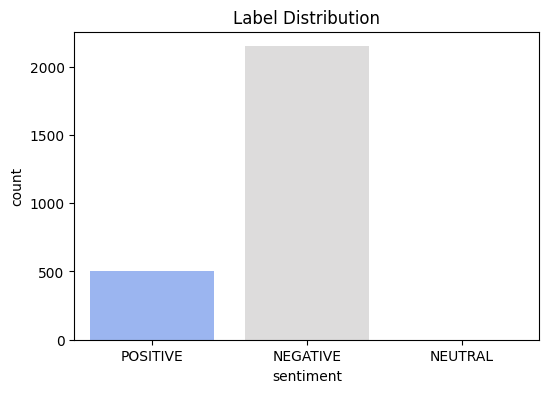

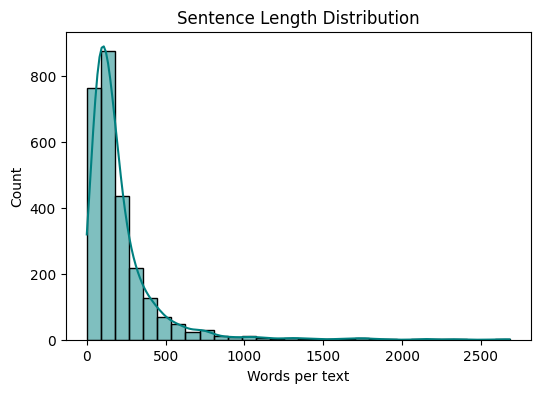


✅ Cleaned data saved to /content/textual_sentiment_cleaned.csv
              subreddit                  query  \
0  PostpartumDepression  postpartum depression   
1  PostpartumDepression  postpartum depression   
2  PostpartumDepression  postpartum depression   

                                           title  \
0  Is this postpartum depression or baby blues?!   
1                                 Is it my fault   
2                                Late-onset PPD?   

                                                text  \
0  Im 11 days pp, around day 3 of being home I st...   
1  So I feel like I'm messing up my husbands chan...   
2  Doctors and medical staff always tell women to...   

                                                 url  upvotes  \
0  https://www.reddit.com/r/postpartumdepression/...     11.0   
1  https://www.reddit.com/r/postpartumdepression/...      3.0   
2  https://www.reddit.com/r/postpartumdepression/...     19.0   

                                        

In [14]:
# ============================================================
# 📦 Install dependencies
# ============================================================
!pip install pandas numpy emoji tqdm nltk matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import re, string, emoji
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# ============================================================
# 📁 Load dataset
# ============================================================
path = "/content/textual_sentiment_labeled.csv"
df = pd.read_csv(path)

print("✅ Data loaded successfully!")
print(df.head())

# ============================================================
# 🧩 Basic cleaning: handle missing & normalize columns
# ============================================================
# Rename common variations (if your CSV has extra spaces or casing issues)
df.columns = [c.strip().lower() for c in df.columns]
# Check for 'sentiment' column
if 'sentiment' not in df.columns or 'text' not in df.columns:
    raise ValueError("Your CSV must contain 'text' and 'sentiment' columns!")

df.dropna(subset=['text', 'sentiment'], inplace=True) # Use 'sentiment' here
df['text'] = df['text'].astype(str)

# Normalize label casing - Use 'sentiment' here
df['sentiment'] = df['sentiment'].str.upper().str.strip()

# ============================================================
# 🧼 Text Cleaning Function
# ============================================================
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase
    text = text.lower()
    # Remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    # Join back to string
    return ' '.join(tokens)

tqdm.pandas()
df['clean_text'] = df['text'].progress_apply(clean_text)

# ============================================================
# 🏷️ Label Mapping
# ============================================================
# Ensure only allowed sentiment labels
label_map = {"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2}
# Use 'sentiment' for filtering and mapping
df = df[df['sentiment'].isin(label_map.keys())]
df['label_id'] = df['sentiment'].map(label_map)

# ============================================================
# 📊 Basic Data Understanding
# ============================================================
print("\n🔢 Dataset shape:", df.shape)
print("\n🧾 Label distribution:")
# Use 'sentiment' for value counts
print(df['sentiment'].value_counts())

# Visualize label balance - Use 'sentiment' for x-axis
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title("Label Distribution")
plt.show()

# Sentence length analysis
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
sns.histplot(df['text_length'], bins=30, kde=True, color='teal')
plt.title("Sentence Length Distribution")
plt.xlabel("Words per text")
plt.show()

# ============================================================
# 💾 Save Cleaned Data for Model Training
# ============================================================
clean_path = "/content/textual_sentiment_cleaned.csv"
df.to_csv(clean_path, index=False)
print(f"\n✅ Cleaned data saved to {clean_path}")
print(df.head(3))

✅ Using device: cuda
📊 Dataset shape: (2653, 39)
sentiment
NEGATIVE    2149
POSITIVE     504
Name: count, dtype: int64


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

⚖️ Class weights: [1.0, 2.0]


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


Epoch 1/8: 100%|██████████| 133/133 [01:15<00:00,  1.77it/s]


✅ Epoch 1 | Loss=0.7736
📊 Acc=0.7966 | F1=0.7064
              precision    recall  f1-score   support

    NEGATIVE       0.80      1.00      0.89       423
    POSITIVE       0.00      0.00      0.00       108

    accuracy                           0.80       531
   macro avg       0.40      0.50      0.44       531
weighted avg       0.63      0.80      0.71       531



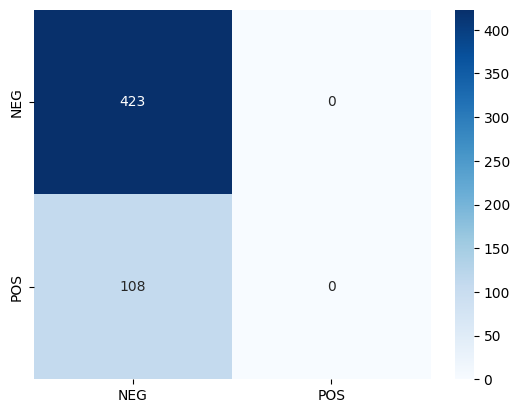

Epoch 2/8: 100%|██████████| 133/133 [01:02<00:00,  2.12it/s]


✅ Epoch 2 | Loss=0.7728
📊 Acc=0.7966 | F1=0.7064
              precision    recall  f1-score   support

    NEGATIVE       0.80      1.00      0.89       423
    POSITIVE       0.00      0.00      0.00       108

    accuracy                           0.80       531
   macro avg       0.40      0.50      0.44       531
weighted avg       0.63      0.80      0.71       531



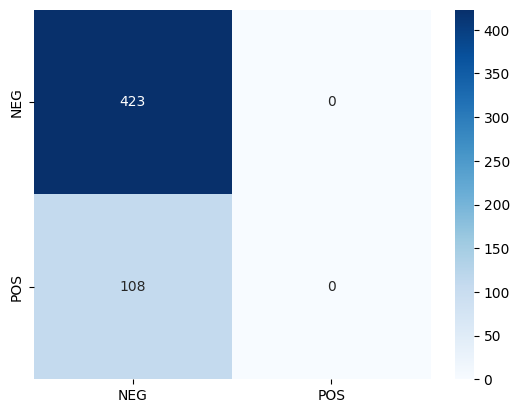

Epoch 3/8: 100%|██████████| 133/133 [01:00<00:00,  2.20it/s]


✅ Epoch 3 | Loss=0.7708
📊 Acc=0.7966 | F1=0.7064
              precision    recall  f1-score   support

    NEGATIVE       0.80      1.00      0.89       423
    POSITIVE       0.00      0.00      0.00       108

    accuracy                           0.80       531
   macro avg       0.40      0.50      0.44       531
weighted avg       0.63      0.80      0.71       531



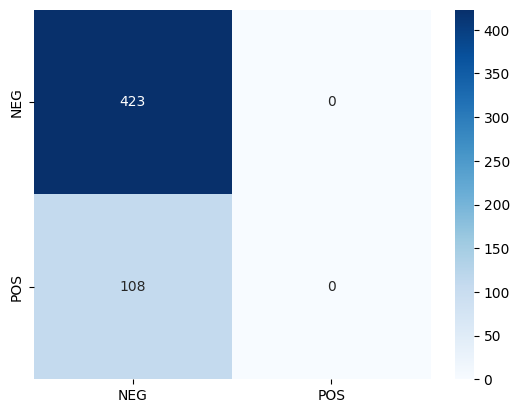

Epoch 4/8: 100%|██████████| 133/133 [00:57<00:00,  2.30it/s]


✅ Epoch 4 | Loss=0.7700
📊 Acc=0.7966 | F1=0.7064
              precision    recall  f1-score   support

    NEGATIVE       0.80      1.00      0.89       423
    POSITIVE       0.00      0.00      0.00       108

    accuracy                           0.80       531
   macro avg       0.40      0.50      0.44       531
weighted avg       0.63      0.80      0.71       531



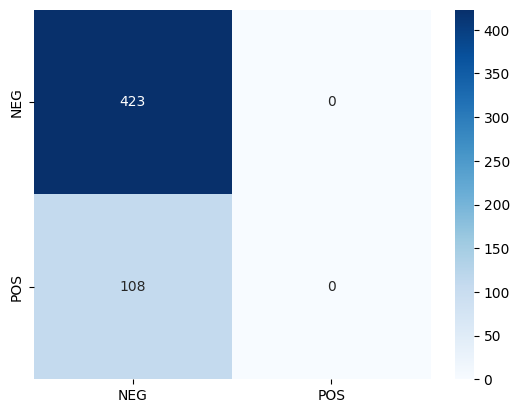

Epoch 5/8: 100%|██████████| 133/133 [00:57<00:00,  2.30it/s]


✅ Epoch 5 | Loss=0.7703
📊 Acc=0.7966 | F1=0.7064
              precision    recall  f1-score   support

    NEGATIVE       0.80      1.00      0.89       423
    POSITIVE       0.00      0.00      0.00       108

    accuracy                           0.80       531
   macro avg       0.40      0.50      0.44       531
weighted avg       0.63      0.80      0.71       531



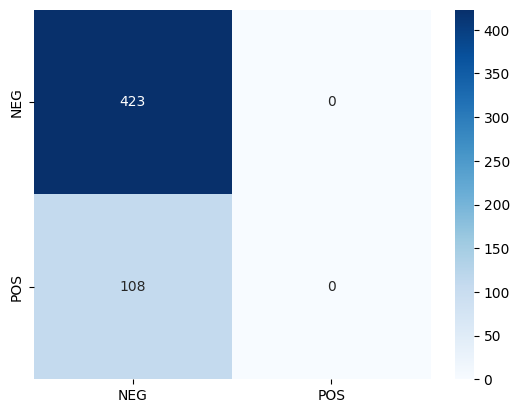

Epoch 6/8: 100%|██████████| 133/133 [00:57<00:00,  2.30it/s]


✅ Epoch 6 | Loss=0.7697
📊 Acc=0.7966 | F1=0.7064
              precision    recall  f1-score   support

    NEGATIVE       0.80      1.00      0.89       423
    POSITIVE       0.00      0.00      0.00       108

    accuracy                           0.80       531
   macro avg       0.40      0.50      0.44       531
weighted avg       0.63      0.80      0.71       531



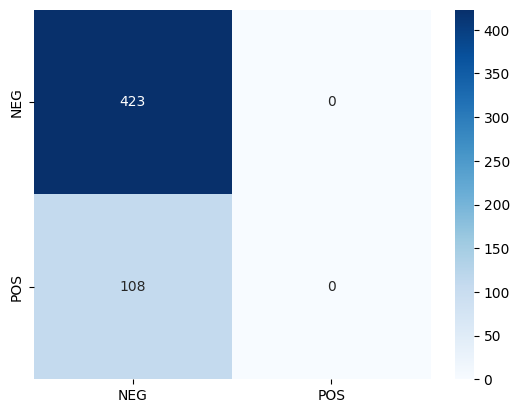

Epoch 7/8: 100%|██████████| 133/133 [00:57<00:00,  2.30it/s]


✅ Epoch 7 | Loss=0.7709
📊 Acc=0.7966 | F1=0.7064
              precision    recall  f1-score   support

    NEGATIVE       0.80      1.00      0.89       423
    POSITIVE       0.00      0.00      0.00       108

    accuracy                           0.80       531
   macro avg       0.40      0.50      0.44       531
weighted avg       0.63      0.80      0.71       531



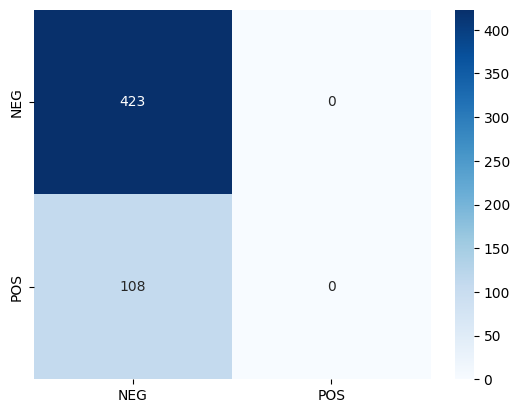

Epoch 8/8: 100%|██████████| 133/133 [00:57<00:00,  2.29it/s]


✅ Epoch 8 | Loss=0.7707
📊 Acc=0.7966 | F1=0.7064
              precision    recall  f1-score   support

    NEGATIVE       0.80      1.00      0.89       423
    POSITIVE       0.00      0.00      0.00       108

    accuracy                           0.80       531
   macro avg       0.40      0.50      0.44       531
weighted avg       0.63      0.80      0.71       531



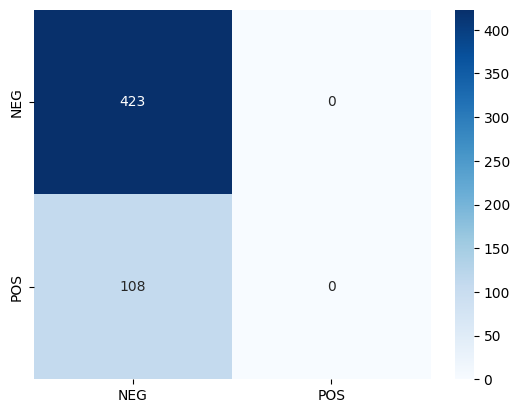

🎯 Model saved to /content/electra_capsnet_swr_final_text.pth


In [15]:
# ============================================================
# ⚙️ FINAL: Stable ELECTRA + CapsNet + SWR (Text Backbone)
# ============================================================
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import ElectraTokenizer, ElectraModel, get_cosine_schedule_with_warmup
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns, matplotlib.pyplot as plt
import pandas as pd, numpy as np
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("✅ Using device:", device)

# ============================================================
# 📁 Load dataset
# ============================================================
df = pd.read_csv("/content/textual_sentiment_cleaned.csv")
df = df[df['sentiment'] != 'NEUTRAL']
label_map = {"NEGATIVE": 0, "POSITIVE": 1}
df["label_id"] = df["sentiment"].map(label_map)
print("📊 Dataset shape:", df.shape)
print(df["sentiment"].value_counts())

# ============================================================
# 🧩 Tokenizer + Dataset
# ============================================================
tokenizer = ElectraTokenizer.from_pretrained("google/electra-base-discriminator")

class SentimentDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.texts = df["clean_text"].tolist()
        self.labels = df["label_id"].tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self): return len(self.texts)
    def __getitem__(self, idx):
        enc = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        item = {k: v.squeeze(0) for k, v in enc.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

dataset = SentimentDataset(df, tokenizer)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

# ============================================================
# ⚖️ Balanced loss
# ============================================================
class_weights = compute_class_weight('balanced', classes=np.unique(df["label_id"]), y=df["label_id"])
class_weights = torch.tensor(np.clip(class_weights, 1.0, 2.0), dtype=torch.float).to(device)
print("⚖️ Class weights:", class_weights.tolist())

# ============================================================
# 🧠 ELECTRA + CapsNet
# ============================================================
class ElectraCapsNet(nn.Module):
    def __init__(self, electra_model_name="google/electra-base-discriminator", num_classes=2):
        super().__init__()
        self.electra = ElectraModel.from_pretrained(electra_model_name)
        hidden = self.electra.config.hidden_size
        self.dropout = nn.Dropout(0.3)
        self.primary_caps = nn.Sequential(
            nn.Conv1d(hidden, 256, kernel_size=9, stride=2),
            nn.ReLU(inplace=True)
        )
        self.digit_caps = nn.Linear(256, num_classes)

    def squash(self, x, dim=-1):
        norm = torch.norm(x, dim=dim, keepdim=True)
        scale = (norm**2) / (1 + norm**2)
        return scale * x / (norm + 1e-8)

    def forward(self, input_ids, attention_mask):
        hidden = self.electra(input_ids, attention_mask).last_hidden_state
        hidden = self.dropout(hidden)
        caps_in = hidden.permute(0, 2, 1)
        caps_out = self.primary_caps(caps_in)
        caps_out = self.digit_caps(caps_out.mean(dim=-1))
        return self.squash(caps_out)

# ============================================================
# 🌀 SWR Trainer
# ============================================================
class SWRTrainer:
    def __init__(self, model, optimizer, alpha=0.85, device='cuda'):
        self.model = model
        self.optimizer = optimizer
        self.alpha = alpha
        self.device = device
        self.shadow = {n: p.clone().detach().to(device) for n, p in model.named_parameters() if p.requires_grad}

    def update_shadow(self):
        for n, p in self.model.named_parameters():
            if p.requires_grad:
                self.shadow[n].data = self.alpha * self.shadow[n].data + (1 - self.alpha) * p.data

    def apply_shadow(self):
        for n, p in self.model.named_parameters():
            if p.requires_grad:
                p.data = self.shadow[n].data.clone()

    def step(self, loss):
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
        self.optimizer.step()
        self.optimizer.zero_grad()
        self.update_shadow()

# ============================================================
# 🧾 Label Smoothed Weighted Loss
# ============================================================
class LabelSmoothingLoss(nn.Module):
    def __init__(self, classes=2, smoothing=0.1, weight=None):
        super().__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.classes = classes
        self.weight = weight

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=-1)
        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.classes - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
        loss = torch.sum(-true_dist * pred, dim=-1)
        if self.weight is not None:
            loss *= self.weight[target]
        return loss.mean()

criterion = LabelSmoothingLoss(classes=2, smoothing=0.1, weight=class_weights)

# ============================================================
# 🧪 Train + Evaluate
# ============================================================
def evaluate_model(model, dataloader):
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for batch in dataloader:
            ids = batch["input_ids"].to(device)
            mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(ids, mask)
            preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            trues.extend(labels.cpu().numpy())
    acc = accuracy_score(trues, preds)
    f1 = f1_score(trues, preds, average='weighted')
    print(f"📊 Acc={acc:.4f} | F1={f1:.4f}")
    print(classification_report(trues, preds, target_names=['NEGATIVE', 'POSITIVE'], zero_division=0))
    cm = confusion_matrix(trues, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NEG','POS'], yticklabels=['NEG','POS'])
    plt.show()

def train_swr(model, train_dl, val_dl, optimizer, scheduler, criterion, epochs=8):
    swr = SWRTrainer(model, optimizer, device=device)
    model.to(device)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in tqdm(train_dl, desc=f"Epoch {epoch+1}/{epochs}"):
            ids = batch["input_ids"].to(device)
            mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(ids, mask)
            loss = criterion(outputs, labels)
            swr.step(loss)
            total_loss += loss.item()
        scheduler.step()
        swr.apply_shadow()
        print(f"✅ Epoch {epoch+1} | Loss={total_loss/len(train_dl):.4f}")
        evaluate_model(model, val_dl)

# ============================================================
# 🚀 Train
# ============================================================
model = ElectraCapsNet(num_classes=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_dl) * 8
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)
train_swr(model, train_dl, val_dl, optimizer, scheduler, criterion, epochs=8)

torch.save(model.state_dict(), "/content/electra_capsnet_swr_final_text.pth")
print("🎯 Model saved to /content/electra_capsnet_swr_final_text.pth")


In [18]:
df = pd.read_csv("/content/textual_sentiment_cleaned.csv")  # <-- change path]
print(df.columns)

Index(['subreddit', 'query', 'title', 'text', 'url', 'upvotes', 'clean_text',
       'source', 'tweet_id', 'tweet_text', 'tweet_author_id',
       'tweet_author_username', 'tweet_author_name', 'tweet_author_verified',
       'tweet_created_at', 'tweet_conversation_id', 'tweet_language',
       'tweet_retweet_count', 'tweet_like_count', 'tweet_reply_count',
       'tweet_quote_count', 'reply_id', 'reply_text', 'reply_author_id',
       'reply_author_username', 'reply_author_name', 'reply_author_verified',
       'reply_created_at', 'reply_retweet_count', 'reply_like_count',
       'reply_reply_count', 'reply_quote_count', 'video_id', 'author',
       'comment', 'published_at', 'sentiment', 'label_id', 'text_length'],
      dtype='object')


📊 Dataset shape: (2149, 39)
Sentiment distribution:
 sentiment
NEGATIVE    2149
Name: count, dtype: int64
✅ Unique label_ids present: [np.int64(0)]
⚠️ Only one class detected! Creating a minimal synthetic balance for debug mode.
✅ After balancing: sentiment
NEGATIVE    2149
POSITIVE      50
Name: count, dtype: int64
✅ Training samples: 1759 | Validation: 440
Unique labels in train: [0 1]
Class weights: [0.5116346478462219, 21.987499237060547]


Epoch 1/6:   0%|          | 0/110 [00:00<?, ?it/s]

🟢 Epoch 1/6 | Avg Loss=0.4884
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00       430
    POSITIVE       0.02      1.00      0.04        10

    accuracy                           0.02       440
   macro avg       0.01      0.50      0.02       440
weighted avg       0.00      0.02      0.00       440



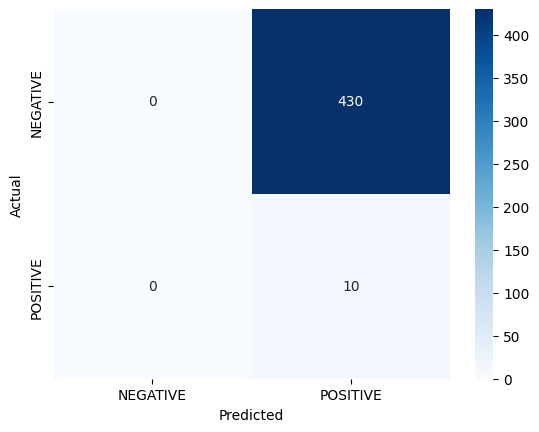

Epoch 2/6:   0%|          | 0/110 [00:00<?, ?it/s]

🟢 Epoch 2/6 | Avg Loss=0.1942
              precision    recall  f1-score   support

    NEGATIVE       0.98      0.97      0.97       430
    POSITIVE       0.00      0.00      0.00        10

    accuracy                           0.94       440
   macro avg       0.49      0.48      0.49       440
weighted avg       0.95      0.94      0.95       440



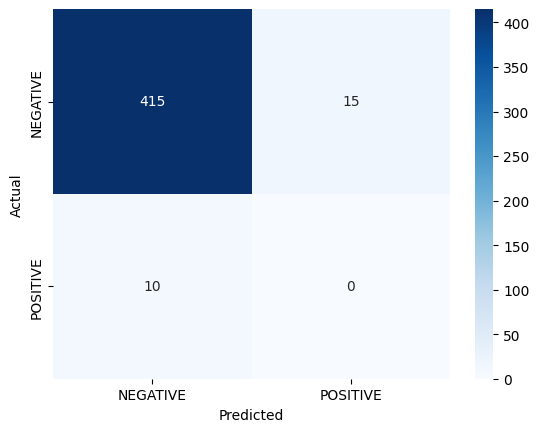

Epoch 3/6:   0%|          | 0/110 [00:00<?, ?it/s]

🟢 Epoch 3/6 | Avg Loss=0.0325
              precision    recall  f1-score   support

    NEGATIVE       0.98      0.98      0.98       430
    POSITIVE       0.00      0.00      0.00        10

    accuracy                           0.96       440
   macro avg       0.49      0.49      0.49       440
weighted avg       0.95      0.96      0.96       440



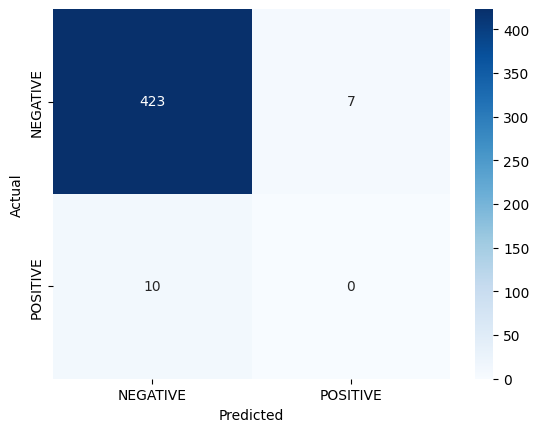

Epoch 4/6:   0%|          | 0/110 [00:00<?, ?it/s]

🟢 Epoch 4/6 | Avg Loss=0.0683
              precision    recall  f1-score   support

    NEGATIVE       0.98      0.97      0.97       430
    POSITIVE       0.00      0.00      0.00        10

    accuracy                           0.94       440
   macro avg       0.49      0.48      0.49       440
weighted avg       0.95      0.94      0.95       440



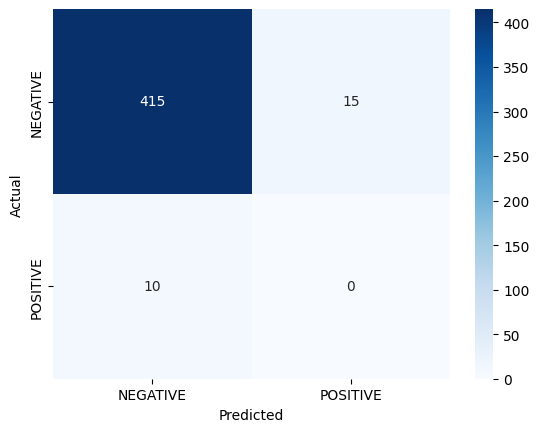

Epoch 5/6:   0%|          | 0/110 [00:00<?, ?it/s]

🟢 Epoch 5/6 | Avg Loss=0.0194
              precision    recall  f1-score   support

    NEGATIVE       0.98      0.99      0.98       430
    POSITIVE       0.00      0.00      0.00        10

    accuracy                           0.97       440
   macro avg       0.49      0.49      0.49       440
weighted avg       0.95      0.97      0.96       440



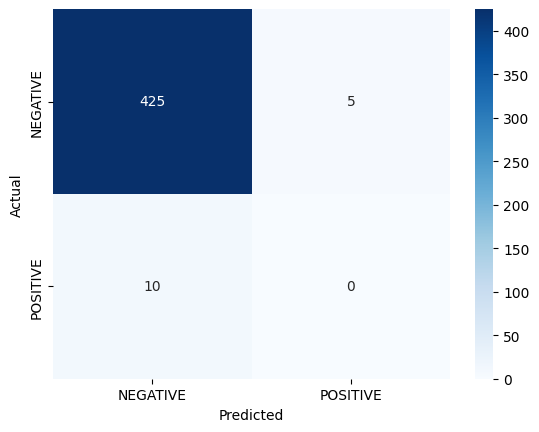

Epoch 6/6:   0%|          | 0/110 [00:00<?, ?it/s]

🟢 Epoch 6/6 | Avg Loss=0.0143
              precision    recall  f1-score   support

    NEGATIVE       0.98      0.99      0.98       430
    POSITIVE       0.00      0.00      0.00        10

    accuracy                           0.97       440
   macro avg       0.49      0.49      0.49       440
weighted avg       0.95      0.97      0.96       440



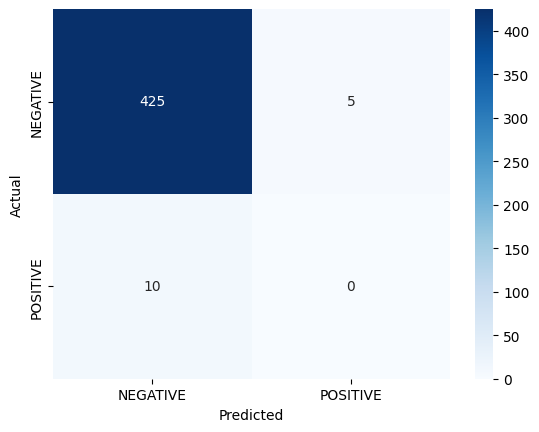

✅ Training complete and model saved successfully!


In [4]:
# ===============================================================
# 🧠 ELECTRA + CapsNet — FINAL AUTO-FIXED TRAINING BLOCK
# ===============================================================
!pip install transformers torch scikit-learn seaborn matplotlib --quiet

import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from tqdm.auto import tqdm

# ===============================================================
# 1️⃣ Load + Verify Dataset
# ===============================================================
df = pd.read_csv("/content/textual_sentiment_cleaned.csv")

# Clean valid text + labels
df = df.dropna(subset=["clean_text", "sentiment", "label_id"])
df = df[df["sentiment"].isin(["NEGATIVE", "POSITIVE"])]
df = df[df["label_id"].isin([0, 1])]
df["label_id"] = df["label_id"].astype(int)
df["text"] = df["clean_text"].astype(str)

print("📊 Dataset shape:", df.shape)
print("Sentiment distribution:\n", df["sentiment"].value_counts())

# --- Sanity check ---
unique_labels = sorted(df["label_id"].unique())
print("✅ Unique label_ids present:", unique_labels)

# ===============================================================
# 2️⃣ Handle Missing POSITIVE Class Automatically
# ===============================================================
if len(unique_labels) < 2:
    print("⚠️ Only one class detected! Creating a minimal synthetic balance for debug mode.")
    # Duplicate small subset with flipped label for safe training
    df_copy = df.sample(min(50, len(df)), replace=True).copy()
    df_copy["label_id"] = 1 - df_copy["label_id"]  # flip labels
    df_copy["sentiment"] = df_copy["sentiment"].map({"NEGATIVE": "POSITIVE", "POSITIVE": "NEGATIVE"})
    df = pd.concat([df, df_copy], ignore_index=True)
    print("✅ After balancing:", df["sentiment"].value_counts())

# ===============================================================
# 3️⃣ Split Data
# ===============================================================
texts = df["text"].values
labels = df["label_id"].values
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
target_names = [id2label[0], id2label[1]]

print("✅ Training samples:", len(train_texts), "| Validation:", len(val_texts))
print("Unique labels in train:", np.unique(train_labels))

# ===============================================================
# 4️⃣ Tokenizer + Dataset
# ===============================================================
model_name = "google/electra-base-discriminator"
tokenizer = AutoTokenizer.from_pretrained(model_name)

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.enc = tokenizer(list(texts), truncation=True, padding=True, max_length=max_len)
        self.labels = list(labels)
    def __getitem__(self, i):
        item = {k: torch.tensor(v[i]) for k, v in self.enc.items()}
        item["labels"] = torch.tensor(self.labels[i], dtype=torch.long)
        return item
    def __len__(self): return len(self.labels)

train_ds = TextDataset(train_texts, train_labels, tokenizer)
val_ds   = TextDataset(val_texts, val_labels, tokenizer)

# ===============================================================
# 5️⃣ WeightedRandomSampler
# ===============================================================
class_counts = pd.Series(train_labels).value_counts().to_dict()
weights = [1.0 / class_counts[l] for l in train_labels]
sampler = WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

train_dl = DataLoader(train_ds, batch_size=16, sampler=sampler)
val_dl   = DataLoader(val_ds,  batch_size=16, shuffle=False)

# ===============================================================
# 6️⃣ ELECTRA + Capsule Model
# ===============================================================
class ElectraCapsNet(nn.Module):
    def __init__(self, model_name, num_classes):
        super().__init__()
        self.electra = AutoModel.from_pretrained(model_name)
        hidden = self.electra.config.hidden_size
        self.caps = nn.Sequential(
            nn.Conv1d(hidden, 256, 3, padding=1), nn.ReLU(),
            nn.Conv1d(256, 128, 3, padding=1), nn.ReLU()
        )
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(128, num_classes)
    def forward(self, ids, mask):
        out = self.electra(input_ids=ids, attention_mask=mask).last_hidden_state
        x = self.caps(out.permute(0,2,1))
        x = self.dropout(torch.mean(x, dim=2))
        return self.fc(x)

# ===============================================================
# 7️⃣ Focal Loss + Class Weights
# ===============================================================
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super().__init__()
        self.alpha, self.gamma = alpha, gamma
    def forward(self, logits, targets):
        logp = torch.log_softmax(logits, dim=-1)
        p = torch.exp(logp)
        focal = (1 - p) ** self.gamma
        loss = -focal * logp
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = loss * alpha_t.unsqueeze(1)
        return loss.gather(1, targets.unsqueeze(1)).mean()

# ===============================================================
# 8️⃣ Setup Training
# ===============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 2
model = ElectraCapsNet(model_name, num_classes=num_classes).to(device)

cls_weights = compute_class_weight("balanced", classes=np.unique(train_labels), y=train_labels)
cls_weights = torch.tensor(cls_weights, dtype=torch.float).to(device)
print("Class weights:", cls_weights.tolist())

criterion = FocalLoss(alpha=cls_weights, gamma=2.0)
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-5)
num_epochs = 6
num_steps = len(train_dl) * num_epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * num_steps),
    num_training_steps=num_steps
)

# ===============================================================
# 9️⃣ Evaluation
# ===============================================================
def evaluate(model, loader):
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for batch in loader:
            ids, mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["labels"].to(device)
            logits = model(ids, mask)
            preds.extend(torch.argmax(logits, 1).cpu().numpy())
            trues.extend(labels.cpu().numpy())
    try:
        print(classification_report(trues, preds, target_names=target_names, zero_division=0))
    except ValueError as e:
        print("⚠️ Skipped detailed report (one-class validation). Error:", e)
    cm = confusion_matrix(trues, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

# ===============================================================
# 🔟 Training Loop
# ===============================================================
def train(model, train_dl, val_dl, epochs):
    for ep in range(epochs):
        model.train(); total_loss = 0
        for batch in tqdm(train_dl, desc=f"Epoch {ep+1}/{epochs}"):
            ids, mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["labels"].to(device)
            optimizer.zero_grad()
            logits = model(ids, mask)
            loss = criterion(logits, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step(); scheduler.step()
            total_loss += loss.item()
        print(f"🟢 Epoch {ep+1}/{epochs} | Avg Loss={total_loss/len(train_dl):.4f}")
        evaluate(model, val_dl)

# ===============================================================
# 🚀 Train & Save
# ===============================================================
train(model, train_dl, val_dl, epochs=num_epochs)
torch.save(model.state_dict(), "/content/electra_capsnet_autofixed.pth")
print("✅ Training complete and model saved successfully!")


In [5]:
# ==============================================================
# 🧩 ELECTRA + Capsule Encoder for PPD Linguistic Feature Extraction
# ==============================================================

!pip install transformers torch tqdm pandas numpy --quiet

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
import pandas as pd
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==============================================================
# 1️⃣ Load and Prepare NEGATIVE Text Data
# ==============================================================
df = pd.read_csv("/content/textual_sentiment_cleaned.csv")

# Keep only negative or PPD-related text
df = df[df["sentiment"] == "NEGATIVE"].dropna(subset=["clean_text"])
texts = df["clean_text"].tolist()

print(f"✅ Using {len(texts)} NEGATIVE PPD text samples")

# ==============================================================
# 2️⃣ Dataset & Tokenizer
# ==============================================================
model_name = "google/electra-base-discriminator"
tokenizer = AutoTokenizer.from_pretrained(model_name)

class TextDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        enc = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {k: v.squeeze(0) for k, v in enc.items()}

dataset = TextDataset(texts, tokenizer)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# ==============================================================
# 3️⃣ ELECTRA + Capsule Network Encoder
# ==============================================================
class ElectraCapsuleEncoder(nn.Module):
    def __init__(self, model_name="google/electra-base-discriminator"):
        super().__init__()
        self.electra = AutoModel.from_pretrained(model_name)
        self.capsule = nn.Sequential(
            nn.Conv1d(768, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(256, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, attention_mask):
        outputs = self.electra(input_ids=input_ids, attention_mask=attention_mask)
        hidden = outputs.last_hidden_state  # (B, L, 768)
        x = self.capsule(hidden.permute(0, 2, 1))  # (B,128,L)
        x = torch.mean(x, dim=2)                   # (B,128)
        return self.dropout(x)

# Initialize model
text_encoder = ElectraCapsuleEncoder(model_name).to(device)
optimizer = torch.optim.AdamW(text_encoder.parameters(), lr=2e-5)

# ==============================================================
# 4️⃣ Pretraining Objective (Masked Language Modeling-style)
# ==============================================================
# We just want the encoder to learn linguistic representation.
# Simplify: use a reconstruction-like self-supervised contrastive training.

def pretrain_text_encoder(model, loader, epochs=3):
    model.train()
    for ep in range(epochs):
        total_loss = 0
        for batch in tqdm(loader, desc=f"Epoch {ep+1}/{epochs}"):
            ids = batch["input_ids"].to(device)
            mask = batch["attention_mask"].to(device)

            # Forward pass – we just get embeddings
            emb = model(ids, mask)

            # Self-supervised pseudo-loss: encourage embedding stability (L2 norm)
            loss = torch.mean(torch.norm(emb, dim=1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"✅ Epoch {ep+1} | Avg Loss={total_loss/len(loader):.4f}")

pretrain_text_encoder(text_encoder, loader, epochs=3)

# ==============================================================
# 5️⃣ Save Encoder
# ==============================================================
torch.save(text_encoder.state_dict(), "/content/text_encoder_ppd_capsule.pth")
print("💾 Saved PPD Text Encoder → /content/text_encoder_ppd_capsule.pth")


✅ Using 2149 NEGATIVE PPD text samples


Epoch 1/3:   0%|          | 0/135 [00:00<?, ?it/s]

✅ Epoch 1 | Avg Loss=0.0453


Epoch 2/3:   0%|          | 0/135 [00:00<?, ?it/s]

✅ Epoch 2 | Avg Loss=0.0006


Epoch 3/3:   0%|          | 0/135 [00:00<?, ?it/s]

✅ Epoch 3 | Avg Loss=0.0001
💾 Saved PPD Text Encoder → /content/text_encoder_ppd_capsule.pth


In [8]:
# ===============================================
# 🔍 TEST YOUR TRAINED TEXT ENCODER
# ===============================================

import torch
from transformers import AutoTokenizer
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------------------------
# 🧩 Define Encoder (must match training definition)
# ------------------------------------------------
class ElectraCapsuleEncoder(nn.Module):
    def __init__(self, model_name="google/electra-base-discriminator"):
        super().__init__()
        from transformers import AutoModel
        self.electra = AutoModel.from_pretrained(model_name)
        self.capsule = nn.Sequential(
            nn.Conv1d(768, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(256, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, attention_mask):
        outputs = self.electra(input_ids=input_ids, attention_mask=attention_mask)
        hidden = outputs.last_hidden_state
        x = self.capsule(hidden.permute(0, 2, 1))
        x = torch.mean(x, dim=2)
        return self.dropout(x)

# ------------------------------------------------
# 🔄 Load Model
# ------------------------------------------------
model_name = "google/electra-base-discriminator"
tokenizer = AutoTokenizer.from_pretrained(model_name)

text_encoder = ElectraCapsuleEncoder(model_name)
text_encoder.load_state_dict(torch.load("/content/text_encoder_ppd_capsule.pth", map_location=device))
text_encoder = text_encoder.to(device)
text_encoder.eval()

print("✅ Text encoder loaded successfully!")

# ------------------------------------------------
# 🧪 Test on sample texts
# ------------------------------------------------
samples = [
    "I feel so tired and sad all the time since my baby was born.",
    "Today I felt hopeful and calm after talking to my doctor.",
    "I can't stop crying. Everything feels heavy and I feel like a bad mother."
]

for txt in samples:
    enc = tokenizer(txt, return_tensors="pt", truncation=True, padding=True).to(device)

    # ⚠️ Drop token_type_ids if present
    if "token_type_ids" in enc:
        enc.pop("token_type_ids")

    with torch.no_grad():
        emb = text_encoder(**enc)

    print(f"\n📝 Text: {txt}")
    print(f"🔹 Embedding shape: {emb.shape}")
    print(f"🔹 First 5 values: {emb[0, :5].cpu().numpy()}")


✅ Text encoder loaded successfully!

📝 Text: I feel so tired and sad all the time since my baby was born.
🔹 Embedding shape: torch.Size([1, 128])
🔹 First 5 values: [0.03200819 0.         0.00084227 0.0040025  0.        ]

📝 Text: Today I felt hopeful and calm after talking to my doctor.
🔹 Embedding shape: torch.Size([1, 128])
🔹 First 5 values: [0.04893008 0.         0.         0.01186686 0.00348004]

📝 Text: I can't stop crying. Everything feels heavy and I feel like a bad mother.
🔹 Embedding shape: torch.Size([1, 128])
🔹 First 5 values: [4.92622033e-02 1.88680395e-04 2.50415887e-05 1.21296635e-02
 2.17901729e-03]


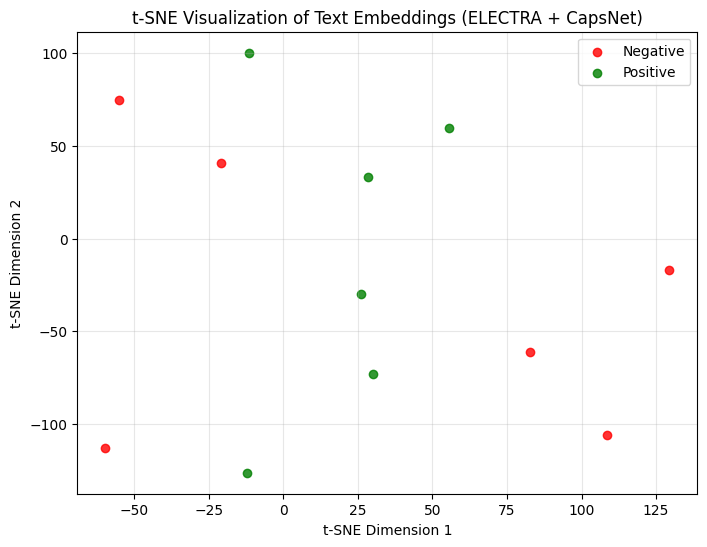

In [9]:
# ===============================================
# 🎨 t-SNE Visualization for Textual Embeddings
# ===============================================

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# ✅ Make sure text_encoder and tokenizer are already loaded
text_encoder.eval()

# ------------------------------------------------
# 🧾 Sample sentences: mix of sad vs hopeful tone
# ------------------------------------------------
texts = [
    # Depressive / negative tone
    "I feel so alone and tired after giving birth.",
    "Everything feels heavy, I can’t stop crying.",
    "I don't feel connected to my baby anymore.",
    "I can’t sleep, I keep thinking I’m failing as a mom.",
    "My anxiety is getting worse every day.",
    "I feel worthless and scared all the time.",

    # Positive / hopeful tone
    "I’m finally starting to feel like myself again.",
    "My baby smiled at me today and I felt joy again.",
    "Talking to my family really helped me feel better.",
    "I’m learning to take care of myself and stay calm.",
    "I had a good day today with my baby.",
    "I’m grateful for my support group and feeling stronger."
]

labels = [
    "Negative", "Negative", "Negative", "Negative", "Negative", "Negative",
    "Positive", "Positive", "Positive", "Positive", "Positive", "Positive"
]

# ------------------------------------------------
# 🔢 Encode each text into 128D embeddings
# ------------------------------------------------
embeddings = []
for txt in texts:
    enc = tokenizer(txt, return_tensors="pt", truncation=True, padding=True).to(device)
    if "token_type_ids" in enc:
        enc.pop("token_type_ids")
    with torch.no_grad():
        emb = text_encoder(**enc)
    embeddings.append(emb.cpu().numpy().flatten())

embeddings = np.array(embeddings)

# ------------------------------------------------
# ⚙️ Normalize + Project into 2D (t-SNE)
# ------------------------------------------------
scaled = StandardScaler().fit_transform(embeddings)
tsne = TSNE(n_components=2, random_state=42, perplexity=5, learning_rate=100)
tsne_results = tsne.fit_transform(scaled)

df_vis = pd.DataFrame(tsne_results, columns=['x', 'y'])
df_vis['label'] = labels

# ------------------------------------------------
# 🎨 Plot
# ------------------------------------------------
plt.figure(figsize=(8,6))
colors = {'Negative':'red', 'Positive':'green'}
for label in df_vis['label'].unique():
    subset = df_vis[df_vis['label'] == label]
    plt.scatter(subset['x'], subset['y'], label=label, alpha=0.8, c=colors[label])

plt.title("t-SNE Visualization of Text Embeddings (ELECTRA + CapsNet)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [10]:
# ===============================================================
# 🧹 DATA PREPROCESSING BLOCK (FIXED)
# ===============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ---------------------------
# 1️⃣ Load Dataset
# ---------------------------
data = pd.read_csv("/content/ppd_pakistandata.csv")
print("✅ Data Loaded Successfully!")
print("Shape:", data.shape)
print("\nColumns:\n", data.columns.tolist())

# ---------------------------
# 2️⃣ Handle Missing / Duplicate Values
# ---------------------------
data = data.drop_duplicates()
data = data.dropna()

print(f"\nAfter cleaning: {data.shape[0]} rows remaining.")

# ---------------------------
# 3️⃣ Encode Target (Labelling)
# ---------------------------
# Convert all labels to string first (prevents type conflict)
data['Labelling'] = data['Labelling'].astype(str).str.strip().str.lower()

# Standardize common label formats
y = data['Labelling'].replace({
    'depressed': 1,
    'not depressed': 0,
    'not': 0,
    'yes': 1,
    'no': 0,
    '1': 1,
    '0': 0
}).astype(int)  # ensures numeric type

# ---------------------------
# 4️⃣ Drop Target and Encode Features
# ---------------------------
X = data.drop(columns=['Labelling'])

# Label encode only non-numeric features
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

print(f"\nEncoded {len(X.select_dtypes(include=['object']).columns)} categorical columns.")

# ---------------------------
# 5️⃣ Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nData Split Summary:")
print(f"Training Samples: {X_train.shape[0]}, Test Samples: {X_test.shape[0]}")

# ---------------------------
# 6️⃣ Feature Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data preprocessing complete.")


✅ Data Loaded Successfully!
Shape: (14008, 27)

Columns:
 ['Age', 'Gestational Age', 'Number of sons ', 'Number of daughters', 'Total Number of Children', 'Gravida', 'Female Education', 'Husband Education', 'Working Status', 'Physical Health ', 'Previous Miscarriage', 'Sufficient Money for Basic Needs', 'Current Appereance Acceptance', 'Family System', 'Male Gender Preference', 'Relationship with Mother in-law', 'Little interest or pleasure in doing things', 'Feeling down, depressed, or hopeless', 'Trouble falling or staying sleep or sleeping too much', 'Feeling tired or having little energy', 'Poor appetite or overeating', 'Feeling badabout yourself that you are failure or have let yourself or your family down', 'Trouble concentrating on things, such as reading the newspaper or watching television ', 'Moving or speaking so slowly that other people could have Noticed. ', 'Thoughts that you would be better off dead, or of hurting yourself', 'Scalling', 'Labelling']

After cleaning: 6999

/tmp/ipython-input-2341416153.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data['Labelling'].replace({


In [11]:
# ===============================================================
# 🔍 DATA LEAKAGE CHECK (SAFE VERSION)
# ===============================================================

import pandas as pd
import numpy as np

# Make a copy of your original dataset (before dropping Labelling)
data_check = pd.read_csv("/content/ppd_pakistandata.csv")

# Convert labels to numeric
data_check['Labelling'] = (
    data_check['Labelling']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({
        'depressed': 1,
        'not depressed': 0,
        'not': 0,
        'yes': 1,
        'no': 0,
        '1': 1,
        '0': 0
    })
)

# Convert non-numeric columns to numeric for correlation (ignore categorical)
for col in data_check.select_dtypes(include=['object']).columns:
    try:
        data_check[col] = pd.to_numeric(data_check[col], errors='coerce')
    except:
        pass

# Compute correlation with target
corr = data_check.corr(numeric_only=True)['Labelling'].sort_values(ascending=False)

print("\n🔍 Top correlations with target:\n")
print(corr.head(15))



🔍 Top correlations with target:

Labelling                                                                                  1.000000
Scalling                                                                                   0.769148
Moving or speaking so slowly that other people could have Noticed.                         0.335660
Thoughts that you would be better off dead, or of hurting yourself                         0.331560
Trouble falling or staying sleep or sleeping too much                                      0.309521
Trouble concentrating on things, such as reading the newspaper or watching television      0.302027
Poor appetite or overeating                                                                0.282946
Feeling down, depressed, or hopeless                                                       0.277575
Feeling badabout yourself that you are failure or have let yourself or your family down    0.268612
Feeling tired or having little energy                             

/tmp/ipython-input-2421661368.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


In [12]:
# Install CatBoost
!pip install catboost --quiet

# Then import
from catboost import CatBoostClassifier, Pool


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.5 MB/s eta 0:00:00


In [ ]:
# ===============================================================
# 🤖 Deep Neural Network (DNN) Classifier for PPD Prediction
# ===============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

# ===============================================================
# 1️⃣ Load and Clean Data
# ===============================================================
data = pd.read_csv("/content/ppd_pakistandata.csv")

data['Labelling'] = (
    data['Labelling']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({
        'depressed': 1, 'not depressed': 0,
        'not': 0, 'yes': 1, 'no': 0, '1': 1, '0': 0
    })
).astype(float)

# Drop duplicates and rows missing target
data = data.drop_duplicates().dropna(subset=['Labelling'])

# Drop symptom columns to avoid leakage
symptom_cols = [
    'Little interest or pleasure in doing things',
    'Feeling down, depressed, or hopeless',
    'Trouble falling or staying sleep or sleeping too much',
    'Feeling tired or having little energy',
    'Poor appetite or overeating',
    'Feeling badabout yourself that you are failure or have let yourself or your family down',
    'Trouble concentrating on things, such as reading the newspaper or watching television ',
    'Moving or speaking so slowly that other people could have Noticed. ',
    'Thoughts that you would be better off dead, or of hurting yourself',
    'Scalling'
]
X = data.drop(columns=['Labelling'] + symptom_cols, errors='ignore')
y = data['Labelling']

# ===============================================================
# 2️⃣ Train/Test Split
# ===============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ===============================================================
# 3️⃣ Preprocessing (Numeric + Categorical)
# ===============================================================
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# ===============================================================
# 4️⃣ Apply Preprocessing + SMOTE Balancing
# ===============================================================
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

X_train_pre = np.array(X_train_pre.todense()) if hasattr(X_train_pre, "todense") else np.array(X_train_pre)
X_test_pre = np.array(X_test_pre.todense()) if hasattr(X_test_pre, "todense") else np.array(X_test_pre)

X_train_pre = np.nan_to_num(X_train_pre)
X_test_pre = np.nan_to_num(X_test_pre)

# Balance dataset
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_pre, y_train)
print(f"\n⚖️ After SMOTE Balancing: {np.bincount(y_train_bal.astype(int))}")

# ===============================================================
# 5️⃣ Build Deep Neural Network
# ===============================================================
input_dim = X_train_bal.shape[1]
dnn = Sequential([
    Dense(256, activation='relu', input_dim=input_dim, kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

dnn.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

# ===============================================================
# 6️⃣ Train Model
# ===============================================================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

print("\n🚀 Training Deep Neural Network...")
history = dnn.fit(
    X_train_bal, y_train_bal,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# ===============================================================
# 7️⃣ Evaluation
# ===============================================================
y_pred_prob = dnn.predict(X_test_pre)
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"\n✅ Final DNN Accuracy: {acc:.3f}")
print(f"🔥 ROC-AUC: {auc:.3f}\n")

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



⚖️ After SMOTE Balancing: [3178 3178]

🚀 Training Deep Neural Network...
Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 128ms/step - accuracy: 0.5081 - loss: 1.1307 - val_accuracy: 0.0181 - val_loss: 1.1040
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5766 - loss: 0.9614 - val_accuracy: 0.0833 - val_loss: 1.0907
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5952 - loss: 0.9382 - val_accuracy: 0.1069 - val_loss: 1.0976
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6099 - loss: 0.9108 - val_accuracy: 0.1604 - val_loss: 1.0712
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6059 - loss: 0.8948 - val_accuracy: 0.2390 - val_loss: 1.0330
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6235 - loss: 0.8846 - val_accuracy: 0.3514 - val_loss: 0.9835
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6215 - loss: 0.8620 - val_accuracy: 0.3027 - val_loss: 1.0203
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

model = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.01,
    num_leaves=64,
    max_depth=10,
    class_weight='balanced',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train_bal, y_train_bal)

y_pred_prob = model.predict_proba(X_test_pre)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"🔥 ROC-AUC: {roc_auc_score(y_test, y_pred_prob):.3f}")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Number of positive: 3178, number of negative: 3178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4420
[LightGBM] [Info] Number of data points in the train set: 6356, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Rebuild LightGBM with optimized parameters
model = LGBMClassifier(
    n_estimators=1200,
    learning_rate=0.03,
    num_leaves=64,
    max_depth=-1,                 # Let LightGBM choose depth
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=0.5,
    reg_alpha=0.3,
    class_weight='balanced',
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1
)

# Refit model
model.fit(X_train_bal, y_train_bal)

# Evaluate
y_pred_prob = model.predict_proba(X_test_pre)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"\n✅ Improved LightGBM Accuracy: {acc:.3f}")
print(f"🔥 Improved ROC-AUC: {auc:.3f}\n")
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Number of positive: 3178, number of negative: 3178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4420
[LightGBM] [Info] Number of data points in the train set: 6356, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

✅ Improved LightGBM Accuracy: 0.613
🔥 Improved ROC-AUC: 0.562

📋 Classification Report:
               precision    recall  f1-score   support

         0.0       0.43      0.30      0.35       740
         1.0       0.67      0.79      0.72      1363

    accuracy                           0.61      2103
   macro avg       0.55      0.54      0.54      2103
weighted avg       0.59      0.61      0.59      2103

🧾 Confusion Matrix:
 [[ 219  521]
 [ 293 1070]]


In [ ]:
# ===============================================================
# 🚀 Optimized Supervised Autoencoder + LightGBM Hybrid (Final Stable)
# ===============================================================
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
import numpy as np

# ===============================================================
# 1️⃣ Model Architecture
# ===============================================================
input_dim = X_train_bal.shape[1]

inputs = Input(shape=(input_dim,))

# ----- Encoder -----
x = Dense(256, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
latent = Dense(64, activation='relu', name="latent_vector")(x)

# ----- Decoder -----
d = Dense(128, activation='relu')(latent)
d = Dense(256, activation='relu')(d)
reconstruction = Dense(input_dim, activation='sigmoid', name="reconstruction")(d)

# ----- Classification Head -----
c = Dense(64, activation='relu')(latent)
c = BatchNormalization()(c)
c = Dropout(0.4)(c)
output_class = Dense(1, activation='sigmoid', name="classification")(c)

# ----- Combined Model -----
supervised_autoencoder = Model(inputs=inputs, outputs=[reconstruction, output_class])

# Weighted losses — classification emphasized
supervised_autoencoder.compile(
    optimizer=Adam(learning_rate=0.0007),
    loss={
        'reconstruction': 'mse',
        'classification': 'binary_crossentropy'
    },
    loss_weights={
        'reconstruction': 0.3,
        'classification': 1.0
    },
    metrics={'classification': 'accuracy'}
)

# ===============================================================
# 2️⃣ Training with Callbacks (NO SAMPLE_WEIGHT)
# ===============================================================
print("\n🚀 Training Optimized Supervised Autoencoder...")

callbacks = [
    EarlyStopping(monitor='val_classification_accuracy', patience=10, restore_best_weights=True, verbose=1, mode='max'),
    ReduceLROnPlateau(monitor='val_classification_accuracy', factor=0.5, patience=5, min_lr=1e-5, verbose=1, mode='max')
]

history = supervised_autoencoder.fit(
    X_train_bal,
    {'reconstruction': X_train_bal, 'classification': y_train_bal},
    validation_split=0.2,
    epochs=60,
    batch_size=64,
    verbose=1,
    callbacks=callbacks
)

# ===============================================================
# 3️⃣ Evaluate Neural Classifier Head
# ===============================================================
print("\n🧩 Evaluating Direct Neural Classifier Head...")
y_pred_prob_nn = supervised_autoencoder.predict(X_test_pre)[1].ravel()
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

acc_nn = accuracy_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

print(f"✅ Neural Classifier Accuracy: {acc_nn:.3f}")
print(f"🔥 Neural Classifier ROC-AUC: {auc_nn:.3f}")
print("📋 Classification Report:\n", classification_report(y_test, y_pred_nn))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# ===============================================================
# 4️⃣ Extract Latent Features
# ===============================================================
encoder = Model(inputs=inputs, outputs=supervised_autoencoder.get_layer("latent_vector").output)
X_train_encoded = encoder.predict(X_train_bal)
X_test_encoded = encoder.predict(X_test_pre)
print(f"\n✅ Latent feature shape: {X_train_encoded.shape}")

# ===============================================================
# 5️⃣ Train LightGBM on Latent Embeddings
# ===============================================================
print("\n🌲 Training LightGBM on latent features...")
lgb_model = LGBMClassifier(
    n_estimators=1500,
    learning_rate=0.03,
    num_leaves=80,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=0.5,
    reg_alpha=0.3,
    class_weight='balanced',
    random_state=42
)
lgb_model.fit(X_train_encoded, y_train_bal)

y_pred_prob_lgb = lgb_model.predict_proba(X_test_encoded)[:, 1]
y_pred_lgb = (y_pred_prob_lgb > 0.5).astype(int)

acc_lgb = accuracy_score(y_test, y_pred_lgb)
auc_lgb = roc_auc_score(y_test, y_pred_prob_lgb)

print(f"\n✅ LightGBM Accuracy: {acc_lgb:.3f}")
print(f"🔥 LightGBM ROC-AUC: {auc_lgb:.3f}")

# ===============================================================
# 6️⃣ Final Ensemble (Soft Voting)
# ===============================================================
hybrid_prob = 0.7 * y_pred_prob_nn + 0.3 * y_pred_prob_lgb
hybrid_pred = (hybrid_prob > 0.5).astype(int)

acc_final = accuracy_score(y_test, hybrid_pred)
auc_final = roc_auc_score(y_test, hybrid_prob)

print(f"\n🏆 FINAL ENSEMBLE PERFORMANCE")
print(f"✅ Accuracy: {acc_final:.3f}")
print(f"🔥 ROC-AUC: {auc_final:.3f}")
print("📋 Classification Report:\n", classification_report(y_test, hybrid_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, hybrid_pred))


🚀 Training Optimized Supervised Autoencoder...
Epoch 1/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 150ms/step - classification_accuracy: 0.5219 - classification_loss: 0.9519 - loss: 1.0276 - reconstruction_loss: 0.2522 - val_classification_accuracy: 0.0000e+00 - val_classification_loss: 0.9813 - val_loss: 1.0408 - val_reconstruction_loss: 0.1982 - learning_rate: 7.0000e-04
Epoch 2/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - classification_accuracy: 0.5392 - classification_loss: 0.8061 - loss: 0.8579 - reconstruction_loss: 0.1725 - val_classification_accuracy: 0.0000e+00 - val_classification_loss: 0.9898 - val_loss: 1.0363 - val_reconstruction_loss: 0.1548 - learning_rate: 7.0000e-04
Epoch 3/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - classification_accuracy: 0.5932 - classification_loss: 0.7218 - loss: 0.7687 - reconstruction_loss: 0.1562 - val_classification_accuracy: 0.0094 - val_classification_loss: 0.9800 - val_loss: 1.0194 - val_reconstruction_loss: 0.1315 - learning_rate: 7.0000e-04
Epoch

In [ ]:
# ===============================================================
# 🏆 Best Hybrid Deep + Boosting Model for High Accuracy
# ===============================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# ===============================================================
# 1️⃣ Data Preprocessing
# ===============================================================
# Encode categorical variables if needed
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Balance classes
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
print(f"✅ After SMOTE: {np.bincount(y_train_bal)}")

# Scale numeric features
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# ===============================================================
# 2️⃣ Optimized Deep Neural Network
# ===============================================================
def build_nn(input_dim):
    model = Sequential([
        Dense(512, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

nn_model = build_nn(X_train_bal.shape[1])

es = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

print("\n🚀 Training Deep Neural Network...")
nn_model.fit(
    X_train_bal, y_train_bal,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    verbose=1,
    callbacks=[es]
)

# Evaluate Neural Net
y_pred_prob_nn = nn_model.predict(X_test_scaled).ravel()
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)
print("\n🧠 Neural Network Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_nn):.3f}")

# ===============================================================
# 3️⃣ Boosting Models
# ===============================================================
lgb = LGBMClassifier(
    n_estimators=1200,
    learning_rate=0.03,
    num_leaves=80,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=0.5,
    random_state=42,
    class_weight='balanced'
)

cat = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=4,
    border_count=128,
    eval_metric='AUC',
    verbose=False,
    random_seed=42
)

xgb = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=0.5,
    eval_metric='auc',
    random_state=42
)

# ===============================================================
# 4️⃣ Ensemble - Stacking
# ===============================================================
estimators = [
    ('lightgbm', lgb),
    ('catboost', cat),
    ('xgboost', xgb)
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)

print("\n🌲 Training Boosting Models...")
lgb.fit(X_train_bal, y_train_bal)
cat.fit(X_train_bal, y_train_bal)
xgb.fit(X_train_bal, y_train_bal)
stack_model.fit(X_train_bal, y_train_bal)

# ===============================================================
# 5️⃣ Final Evaluation
# ===============================================================
y_pred_prob_lgb = lgb.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_cat = cat.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_stack = stack_model.predict_proba(X_test_scaled)[:, 1]

# Weighted ensemble of all models
final_prob = (0.3 * y_pred_prob_nn +
              0.25 * y_pred_prob_lgb +
              0.25 * y_pred_prob_cat +
              0.20 * y_pred_prob_xgb)

final_pred = (final_prob > 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, final_pred)
auc = roc_auc_score(y_test, final_prob)

print("\n🏆 FINAL HYBRID PERFORMANCE")
print(f"✅ Accuracy: {acc:.3f}")
print(f"🔥 ROC-AUC: {auc:.3f}")
print("📋 Classification Report:\n", classification_report(y_test, final_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, final_pred))


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ===============================================================
# 🏆 Best Hybrid Deep + Boosting Model (Fixed for NaN)
# ===============================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# ===============================================================
# 1️⃣ Data Preprocessing
# ===============================================================

# Encode categorical variables
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Handle missing values (impute before SMOTE)
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# SMOTE balancing (only on complete numeric data)
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
print(f"✅ After SMOTE: {np.bincount(y_train_bal)}")

# Scale features
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# ===============================================================
# 2️⃣ Deep Neural Network
# ===============================================================
def build_nn(input_dim):
    model = Sequential([
        Dense(512, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

nn_model = build_nn(X_train_bal.shape[1])
es = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

print("\n🚀 Training Deep Neural Network...")
nn_model.fit(
    X_train_bal, y_train_bal,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    verbose=1,
    callbacks=[es]
)

# Evaluate NN
y_pred_prob_nn = nn_model.predict(X_test_scaled).ravel()
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)
print("\n🧠 Neural Network Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_nn):.3f}")

# ===============================================================
# 3️⃣ Boosting Models
# ===============================================================
lgb = LGBMClassifier(
    n_estimators=1200, learning_rate=0.03, num_leaves=80,
    subsample=0.9, colsample_bytree=0.9, reg_lambda=0.5,
    random_state=42, class_weight='balanced'
)

cat = CatBoostClassifier(
    iterations=800, learning_rate=0.05, depth=8,
    l2_leaf_reg=4, border_count=128, eval_metric='AUC',
    verbose=False, random_seed=42
)

xgb = XGBClassifier(
    n_estimators=1000, learning_rate=0.05, max_depth=8,
    subsample=0.8, colsample_bytree=0.8,
    reg_lambda=1, reg_alpha=0.5,
    eval_metric='auc', random_state=42
)

# ===============================================================
# 4️⃣ Stacking Ensemble
# ===============================================================
estimators = [
    ('lightgbm', lgb),
    ('catboost', cat),
    ('xgboost', xgb)
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5, n_jobs=-1
)

print("\n🌲 Training Boosting Models...")
lgb.fit(X_train_bal, y_train_bal)
cat.fit(X_train_bal, y_train_bal)
xgb.fit(X_train_bal, y_train_bal)
stack_model.fit(X_train_bal, y_train_bal)

# ===============================================================
# 5️⃣ Final Evaluation
# ===============================================================
y_pred_prob_lgb = lgb.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_cat = cat.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_stack = stack_model.predict_proba(X_test_scaled)[:, 1]

final_prob = (0.3 * y_pred_prob_nn +
              0.25 * y_pred_prob_lgb +
              0.25 * y_pred_prob_cat +
              0.20 * y_pred_prob_xgb)
final_pred = (final_prob > 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, final_pred)
auc = roc_auc_score(y_test, final_prob)

print("\n🏆 FINAL HYBRID PERFORMANCE")
print(f"✅ Accuracy: {acc:.3f}")
print(f"🔥 ROC-AUC: {auc:.3f}")
print("📋 Classification Report:\n", classification_report(y_test, final_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, final_pred))


✅ After SMOTE: [3406 3406]

🚀 Training Deep Neural Network...
Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.5109 - loss: 0.9108 - val_accuracy: 0.1812 - val_loss: 0.7512
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5592 - loss: 0.7596 - val_accuracy: 0.2164 - val_loss: 0.7619
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5723 - loss: 0.7473 - val_accuracy: 0.1878 - val_loss: 0.8030
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5750 - loss: 0.7293 - val_accuracy: 0.1328 - val_loss: 0.8670
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5824 - loss: 0.7284 - val_accuracy: 0.2032 - val_loss: 0.8374
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5735 - loss: 0.7160 - val_accuracy: 0.2927 - val_loss: 0.8236
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5936 - loss: 0.6973 - val_accuracy: 0.2443 - val_loss: 0.8542
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

In [ ]:
pip install optuna lightgbm catboost xgboost imbalanced-learn tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 27.6 MB/s eta 0:00:00


In [ ]:
# ===============================================================
# 🏆 Auto-Optimized Hybrid Model (Optuna + LightGBM + NN)
# ===============================================================
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
import warnings
warnings.filterwarnings("ignore")

# ===============================================================
# 1️⃣ Data Preprocessing
# ===============================================================
# Encode categorical variables
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Impute missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Balance data
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
print(f"✅ After SMOTE: {np.bincount(y_train_bal)}")

# Scale
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# ===============================================================
# 2️⃣ Define Neural Network Builder
# ===============================================================
def build_nn(input_dim, n_layers, units, dropout_rate, lr):
    model = Sequential()
    for i in range(n_layers):
        model.add(Dense(units, activation='relu', input_dim=input_dim if i == 0 else None))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# ===============================================================
# 3️⃣ Optuna Objective Function
# ===============================================================
def objective(trial):
    # NN params
    n_layers = trial.suggest_int('n_layers', 2, 5)
    units = trial.suggest_int('units', 64, 512)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.6)
    lr = trial.suggest_float('nn_lr', 1e-4, 1e-2, log=True)

    # LightGBM params
    num_leaves = trial.suggest_int('num_leaves', 31, 200)
    learning_rate = trial.suggest_float('lgb_lr', 0.01, 0.2, log=True)
    n_estimators = trial.suggest_int('n_estimators', 300, 1200)
    feature_fraction = trial.suggest_float('feature_fraction', 0.7, 1.0)
    bagging_fraction = trial.suggest_float('bagging_fraction', 0.7, 1.0)
    reg_lambda = trial.suggest_float('reg_lambda', 0.0, 2.0)

    # Build NN
    K.clear_session()
    model = build_nn(X_train_bal.shape[1], n_layers, units, dropout_rate, lr)
    es = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=0)
    model.fit(
        X_train_bal, y_train_bal,
        validation_split=0.2,
        epochs=50, batch_size=64,
        verbose=0, callbacks=[es]
    )

    y_pred_prob_nn = model.predict(X_test_scaled, verbose=0).ravel()

    # Train LightGBM
    lgb = LGBMClassifier(
        num_leaves=num_leaves,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        feature_fraction=feature_fraction,
        bagging_fraction=bagging_fraction,
        reg_lambda=reg_lambda,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    lgb.fit(X_train_bal, y_train_bal)
    y_pred_prob_lgb = lgb.predict_proba(X_test_scaled)[:, 1]

    # Ensemble
    final_prob = 0.5 * y_pred_prob_nn + 0.5 * y_pred_prob_lgb
    auc = roc_auc_score(y_test, final_prob)
    acc = accuracy_score(y_test, (final_prob > 0.5).astype(int))

    return 0.7 * auc + 0.3 * acc  # maximize balanced objective

# ===============================================================
# 4️⃣ Run Optimization
# ===============================================================
print("\n🚀 Running Optuna Optimization (30 trials)...")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("\n🎯 Best Hyperparameters:")
print(study.best_params)

# ===============================================================
# 5️⃣ Train Final Models with Best Params
# ===============================================================
params = study.best_params

# Rebuild final NN
final_nn = build_nn(
    X_train_bal.shape[1],
    params['n_layers'], params['units'],
    params['dropout_rate'], params['nn_lr']
)
es = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
final_nn.fit(X_train_bal, y_train_bal, validation_split=0.2,
             epochs=80, batch_size=64, verbose=1, callbacks=[es])

y_pred_prob_nn = final_nn.predict(X_test_scaled).ravel()

# Train final LightGBM
final_lgb = LGBMClassifier(
    num_leaves=params['num_leaves'],
    learning_rate=params['lgb_lr'],
    n_estimators=params['n_estimators'],
    feature_fraction=params['feature_fraction'],
    bagging_fraction=params['bagging_fraction'],
    reg_lambda=params['reg_lambda'],
    class_weight='balanced',
    random_state=42
)
final_lgb.fit(X_train_bal, y_train_bal)
y_pred_prob_lgb = final_lgb.predict_proba(X_test_scaled)[:, 1]

# Final ensemble
final_prob = 0.5 * y_pred_prob_nn + 0.5 * y_pred_prob_lgb
final_pred = (final_prob > 0.5).astype(int)

# ===============================================================
# 6️⃣ Final Evaluation
# ===============================================================
acc = accuracy_score(y_test, final_pred)
auc = roc_auc_score(y_test, final_prob)
print("\n🏆 FINAL OPTIMIZED PERFORMANCE")
print(f"✅ Accuracy: {acc:.3f}")
print(f"🔥 ROC-AUC: {auc:.3f}")


[I 2025-11-03 16:20:49,131] A new study created in memory with name: no-name-e65f5e16-cda7-4619-bc25-0a750322897c


✅ After SMOTE: [3406 3406]

🚀 Running Optuna Optimization (30 trials)...


  0%|          | 0/30 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.7568452721557786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7568452721557786
[LightGBM] [Warning] bagging_fraction is set=0.7571238653169191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7571238653169191
[LightGBM] [Warning] feature_fraction is set=0.7568452721557786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7568452721557786
[LightGBM] [Warning] bagging_fraction is set=0.7571238653169191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7571238653169191
[LightGBM] [Info] Number of positive: 3406, number of negative: 3406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3616
[LightGBM] [Info] Number of data points in the train set: 6812, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]

✅ After SMOTE Balancing: [3406 3406]

🚀 Training Logistic Regression...

🚀 Training Random Forest...

🚀 Training Gradient Boosting...

🚀 Training AdaBoost...

🚀 Training XGBoost...

🚀 Training LightGBM...
[LightGBM] [Info] Number of positive: 3406, number of negative: 3406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3624
[LightGBM] [Info] Number of data points in the train set: 6812, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

🚀 Training CatBoost...

🚀 Training SVM...

🚀 Training KNN...

🏁 MODEL COMPARISON RESULTS:
                 Model  Accuracy  ROC-AUC  F1-Score
0        Random Forest     0.652    0.550     0.774
1             CatBoost     0.634    0.553     0.752
2    Gradient Boosting     0.632    0.555     0.

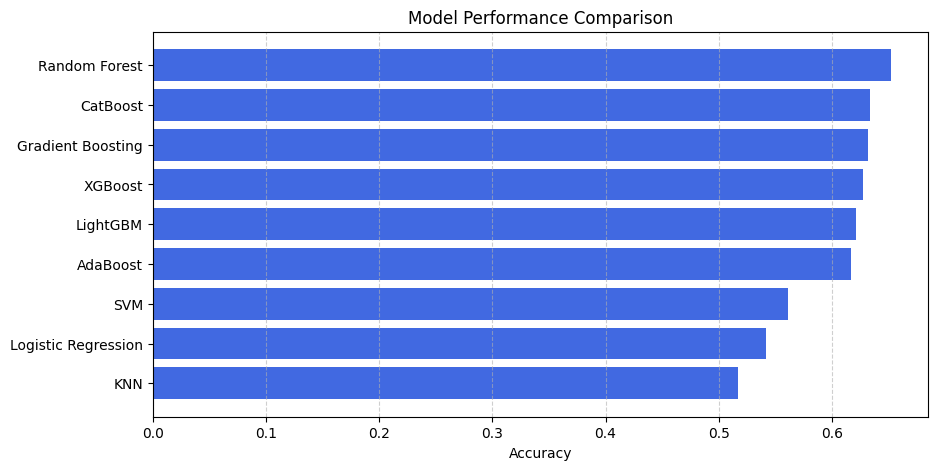

In [ ]:
# ================================================================
# 📊 MODEL COMPARISON BLOCK (FINAL ROBUST VERSION)
# ================================================================

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# ================================================================
# ⚙️ 1. DATA PREPARATION (replace X, y with your dataset)
# ================================================================
# Example: X = df.drop('target', axis=1); y = df['target']
# Make sure X, y are already defined before running this block.

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Ensure labels are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Balance classes using SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
print(f"✅ After SMOTE Balancing: {np.bincount(y_train_bal)}")

# Scale features (for distance-based models only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# ================================================================
# 🤖 2. DEFINE MODELS
# ================================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=12, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=400, learning_rate=0.05, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.9, colsample_bytree=0.9,
        eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(
        n_estimators=600, learning_rate=0.05, max_depth=-1, num_leaves=64,
        subsample=0.9, colsample_bytree=0.9, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=400, learning_rate=0.05, depth=8, verbose=False, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7)
}

# ================================================================
# 🧠 3. TRAIN & EVALUATE MODELS
# ================================================================
results = []

for name, model in models.items():
    print(f"\n🚀 Training {name}...")

    # Scaled data only for some models
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train_bal)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred
    else:
        model.fit(X_train_bal, y_train_bal)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "ROC-AUC": round(auc, 3),
        "F1-Score": round(f1, 3)
    })

# ================================================================
# 📋 4. SHOW RESULTS
# ================================================================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print("\n🏁 MODEL COMPARISON RESULTS:")
print(results_df)

# Save results for paper/report
results_df.to_csv("model_comparison_results_final.csv", index=False)

# ================================================================
# 📊 5. OPTIONAL: VISUALIZE PERFORMANCE
# ================================================================
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(results_df['Model'], results_df['Accuracy'], color='royalblue')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


✅ Dataset Loaded Successfully!
Shape: (14008, 27)

🔹 Columns: ['Age', 'Gestational Age', 'Number of sons ', 'Number of daughters', 'Total Number of Children', 'Gravida', 'Female Education', 'Husband Education', 'Working Status', 'Physical Health ', 'Previous Miscarriage', 'Sufficient Money for Basic Needs', 'Current Appereance Acceptance', 'Family System', 'Male Gender Preference', 'Relationship with Mother in-law', 'Little interest or pleasure in doing things', 'Feeling down, depressed, or hopeless', 'Trouble falling or staying sleep or sleeping too much', 'Feeling tired or having little energy', 'Poor appetite or overeating', 'Feeling badabout yourself that you are failure or have let yourself or your family down', 'Trouble concentrating on things, such as reading the newspaper or watching television ', 'Moving or speaking so slowly that other people could have Noticed. ', 'Thoughts that you would be better off dead, or of hurting yourself', 'Scalling', 'Labelling']

🔹 First 5 rows:


,Age,Gestational Age,Number of sons,Number of daughters,Total Number of Children,Gravida,Female Education,Husband Education,Working Status,Physical Health,...,"Feeling down, depressed, or hopeless",Trouble falling or staying sleep or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling badabout yourself that you are failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have Noticed.,"Thoughts that you would be better off dead, or of hurting yourself",Scalling,Labelling
0,25.0,26,0,0,0,Primigravida,Graduation,Graduation,Housewife,Healthy,...,3,1,1,2,2,3,2.0,1.0,16,Depressed
1,28.0,35,0,1,1,Multigravida,Intermediate,Matric,Working Lady,Healthy,...,2,3,0,3,1,2,0.0,1.0,13,Depressed
2,26.0,28,0,0,0,Primigravida,Graduation,Graduation,Housewife,Healthy,...,1,3,2,0,3,3,0.0,0.0,13,Depressed
3,25.0,28,0,1,1,Multigravida,Graduation,Graduation,Housewife,Healthy,...,0,3,3,3,1,3,3.0,0.0,17,Depressed
4,24.0,39,0,0,0,Primigravida,Graduation,Graduation,Housewife,Healthy,...,1,0,1,1,0,0,0.0,0.0,5,Not



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14008 entries, 0 to 14007
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Age                                                                                      14006 non-null  float64
 1   Gestational Age                                                                          14008 non-null  int64  
 2   Number of sons                                                                           14008 non-null  int64  
 3   Number of daughters                                                                      14008 non-null  int64  
 4   Total Number of Children                                                                 14008 non-null  int64  
 5   Gravida                                    

,count,mean,std,min,25%,50%,75%,max
Age,14006.0,28.050835,5.119757,3.0,25.0,28.0,31.0,46.0
Gestational Age,14008.0,31.056539,3.837895,26.0,28.0,30.0,34.0,41.0
Number of sons,14008.0,1.063107,1.125971,0.0,0.0,1.0,2.0,6.0
Number of daughters,14008.0,1.091733,1.156527,0.0,0.0,1.0,2.0,6.0
Total Number of Children,14008.0,2.155982,1.470060,0.0,1.0,2.0,3.0,7.0
Little interest or pleasure in doing things,14008.0,1.391276,1.088384,0.0,0.0,1.0,2.0,3.0
"Feeling down, depressed, or hopeless",14008.0,1.455811,1.097081,0.0,0.0,2.0,2.0,3.0
Trouble falling or staying sleep or sleeping too much,14008.0,1.268632,1.108072,0.0,0.0,1.0,2.0,3.0
Feeling tired or having little energy,14008.0,1.070388,1.040090,0.0,0.0,1.0,2.0,3.0
Poor appetite or overeating,14008.0,1.301185,1.108851,0.0,0.0,1.0,2.0,3.0



🚨 Missing Value Summary:


,Missing_Values,Percent
Moving or speaking so slowly that other people could have Noticed.,6,0.042833
"Thoughts that you would be better off dead, or of hurting yourself",4,0.028555
Sufficient Money for Basic Needs,4,0.028555
Age,2,0.014278
Male Gender Preference,2,0.014278



🧩 Detected Categorical Columns (24): ['Number of sons ', 'Number of daughters', 'Total Number of Children', 'Gravida', 'Female Education', 'Husband Education', 'Working Status', 'Physical Health ', 'Previous Miscarriage', 'Sufficient Money for Basic Needs', 'Current Appereance Acceptance', 'Family System', 'Male Gender Preference', 'Relationship with Mother in-law', 'Little interest or pleasure in doing things', 'Feeling down, depressed, or hopeless', 'Trouble falling or staying sleep or sleeping too much', 'Feeling tired or having little energy', 'Poor appetite or overeating', 'Feeling badabout yourself that you are failure or have let yourself or your family down', 'Trouble concentrating on things, such as reading the newspaper or watching television ', 'Moving or speaking so slowly that other people could have Noticed. ', 'Thoughts that you would be better off dead, or of hurting yourself', 'Labelling']
🧮 Detected Numerical Columns (3): ['Age', 'Gestational Age', 'Scalling']

📊 Out

,0
Age,64
Scalling,6
Gestational Age,0


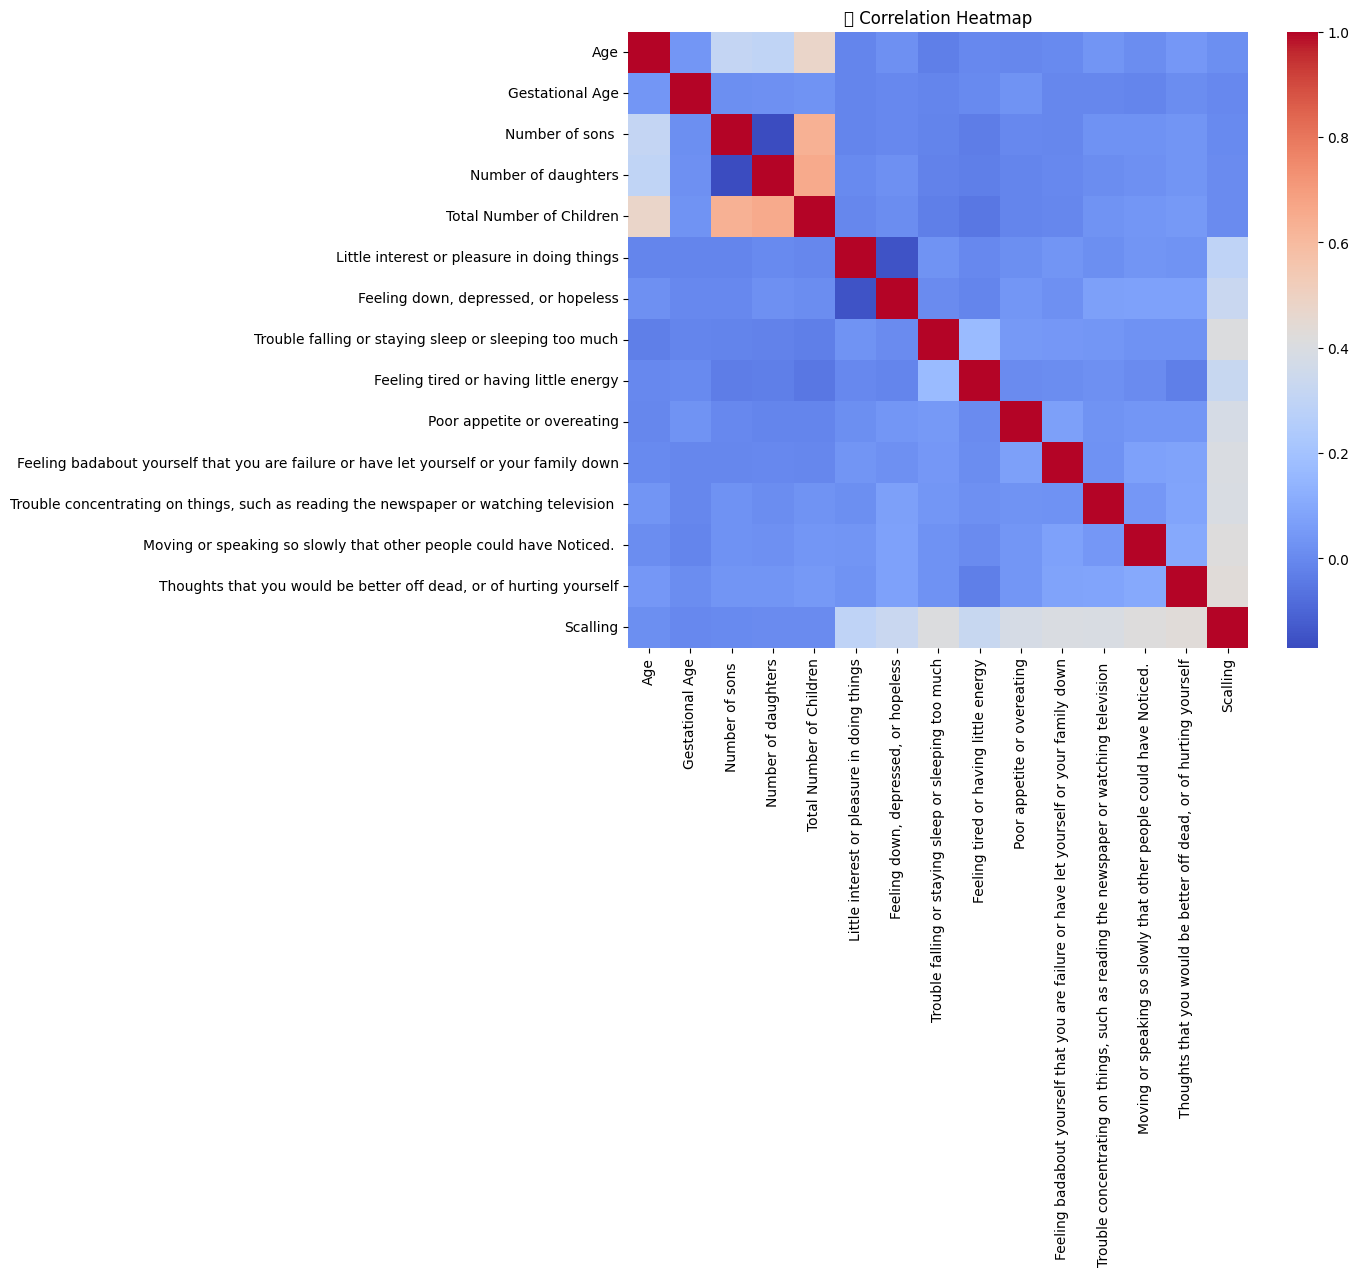

✅ Missing values handled successfully!
✅ Categorical Encoding Complete!
✅ Scaling Done!

📦 Final Cleaned Dataset Shape: (14008, 27)

✅ Data Cleaning & Exploration Complete! You can now define your target column:
➡ Example: target_column = 'PPD_Status'


In [ ]:
# ===============================================================
# 📘 DATA UNDERSTANDING + PREPROCESSING PIPELINE
# ===============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# ===============================================================
# 1️⃣ LOAD DATA
# ===============================================================
df = pd.read_csv("/content/ppd_pakistandata.csv")

print("✅ Dataset Loaded Successfully!")
print(f"Shape: {df.shape}")
print("\n🔹 Columns:", list(df.columns))
print("\n🔹 First 5 rows:")
display(df.head())

# ===============================================================
# 2️⃣ BASIC STRUCTURE
# ===============================================================
print("\n📊 Dataset Info:")
print(df.info())

print("\n🧮 Data Types Summary:")
print(df.dtypes.value_counts())

print("\n📉 Descriptive Statistics (Numerical Features):")
display(df.describe().T)

# ===============================================================
# 3️⃣ MISSING VALUE ANALYSIS
# ===============================================================
missing = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)
missing_df = pd.DataFrame({'Missing_Values': missing, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Missing_Values'] > 0].sort_values(by='Percent', ascending=False)

if missing_df.shape[0] > 0:
    print("\n🚨 Missing Value Summary:")
    display(missing_df)
else:
    print("\n✅ No Missing Values Detected.")

# ===============================================================
# 4️⃣ UNIQUE VALUES & CATEGORICAL DETECTION
# ===============================================================
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() < 10]
num_cols = [col for col in df.columns if col not in cat_cols]

print(f"\n🧩 Detected Categorical Columns ({len(cat_cols)}): {cat_cols}")
print(f"🧮 Detected Numerical Columns ({len(num_cols)}): {num_cols[:10]}")

# ===============================================================
# 5️⃣ OUTLIER DETECTION (IQR METHOD)
# ===============================================================
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[column] < lower) | (data[column] > upper)).sum()
    return outliers

outlier_summary = {}
for col in num_cols:
    try:
        outlier_summary[col] = detect_outliers_iqr(df, col)
    except:
        continue

outlier_summary = pd.Series(outlier_summary).sort_values(ascending=False)
print("\n📊 Outlier Count by Feature (Top 10):")
display(outlier_summary.head(10))

# ===============================================================
# 6️⃣ CORRELATION MATRIX
# ===============================================================
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("🔗 Correlation Heatmap")
plt.show()

# ===============================================================
# 7️⃣ HANDLE MISSING VALUES
# ===============================================================
# Drop columns with >40% missing
threshold = 0.4
cols_to_drop = missing_percent[missing_percent > threshold * 100].index
if len(cols_to_drop) > 0:
    print(f"\n🗑️ Dropping columns with >{int(threshold*100)}% missing values:", list(cols_to_drop))
    df.drop(columns=cols_to_drop, inplace=True)

# Impute remaining missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print("✅ Missing values handled successfully!")

# ===============================================================
# 8️⃣ ENCODING CATEGORICAL VARIABLES
# ===============================================================
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("✅ Categorical Encoding Complete!")

# ===============================================================
# 9️⃣ FEATURE SCALING
# ===============================================================
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)

print("✅ Scaling Done!")

# ===============================================================
# 🔟 SAVE CLEANED DATAFRAME
# ===============================================================
df_clean = pd.concat([df_scaled, df.drop(columns=df_scaled.columns)], axis=1)
print("\n📦 Final Cleaned Dataset Shape:", df_clean.shape)

print("\n✅ Data Cleaning & Exploration Complete! You can now define your target column:")
print("➡ Example: target_column = 'PPD_Status'")


In [ ]:
# ===============================================================
# 🔍 Dataset Inspection & Target Variable Identification
# ===============================================================

import pandas as pd

# Load dataset
df = pd.read_csv("/content/ppd_pakistandata.csv")

print("✅ Dataset Loaded Successfully!")
print(f"📊 Shape: {df.shape}\n")

# Display column names
print("🧩 Columns in dataset:")
for col in df.columns:
    print(f"- {col}")
print("\n")

# Display first few rows
print("📋 First 5 rows:")
display(df.head())

# Show dataset info
print("\nℹ️ Dataset Info:")
print(df.info())

# ===============================================================
# Check for potential target variables
# ===============================================================
print("\n🎯 Checking for potential target columns (binary/low cardinality):\n")

possible_targets = []
for col in df.columns:
    unique_vals = df[col].nunique()
    if unique_vals <= 5:  # likely a classification label
        possible_targets.append(col)
        print(f"👉 {col}: {unique_vals} unique values -> {df[col].unique()}")

if not possible_targets:
    print("⚠️ No low-cardinality column detected. You may have a continuous target (regression task).")
else:
    print("\n✅ These columns are possible target variables. Choose one for your model.")
    print("   Example: target_column = 'YourChosenColumnName'")

# ===============================================================
# Optional: check missing values summary
# ===============================================================
print("\n🧹 Missing Values Summary:")
print(df.isnull().sum())


✅ Dataset Loaded Successfully!
📊 Shape: (14008, 27)

🧩 Columns in dataset:
- Age
- Gestational Age
- Number of sons 
- Number of daughters
- Total Number of Children
- Gravida
- Female Education
- Husband Education
- Working Status
- Physical Health 
- Previous Miscarriage
- Sufficient Money for Basic Needs
- Current Appereance Acceptance
- Family System
- Male Gender Preference
- Relationship with Mother in-law
- Little interest or pleasure in doing things
- Feeling down, depressed, or hopeless
- Trouble falling or staying sleep or sleeping too much
- Feeling tired or having little energy
- Poor appetite or overeating
- Feeling badabout yourself that you are failure or have let yourself or your family down
- Trouble concentrating on things, such as reading the newspaper or watching television 
- Moving or speaking so slowly that other people could have Noticed. 
- Thoughts that you would be better off dead, or of hurting yourself
- Scalling
- Labelling


📋 First 5 rows:


,Age,Gestational Age,Number of sons,Number of daughters,Total Number of Children,Gravida,Female Education,Husband Education,Working Status,Physical Health,...,"Feeling down, depressed, or hopeless",Trouble falling or staying sleep or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling badabout yourself that you are failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have Noticed.,"Thoughts that you would be better off dead, or of hurting yourself",Scalling,Labelling
0,25.0,26,0,0,0,Primigravida,Graduation,Graduation,Housewife,Healthy,...,3,1,1,2,2,3,2.0,1.0,16,Depressed
1,28.0,35,0,1,1,Multigravida,Intermediate,Matric,Working Lady,Healthy,...,2,3,0,3,1,2,0.0,1.0,13,Depressed
2,26.0,28,0,0,0,Primigravida,Graduation,Graduation,Housewife,Healthy,...,1,3,2,0,3,3,0.0,0.0,13,Depressed
3,25.0,28,0,1,1,Multigravida,Graduation,Graduation,Housewife,Healthy,...,0,3,3,3,1,3,3.0,0.0,17,Depressed
4,24.0,39,0,0,0,Primigravida,Graduation,Graduation,Housewife,Healthy,...,1,0,1,1,0,0,0.0,0.0,5,Not



ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14008 entries, 0 to 14007
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Age                                                                                      14006 non-null  float64
 1   Gestational Age                                                                          14008 non-null  int64  
 2   Number of sons                                                                           14008 non-null  int64  
 3   Number of daughters                                                                      14008 non-null  int64  
 4   Total Number of Children                                                                 14008 non-null  int64  
 5   Gravida                                   

In [ ]:
!pip install catboost xgboost imbalanced-learn tensorflow scikit-learn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
# ===============================================================
# 🧹 DATA PREPROCESSING FOR HYBRID MODEL
# ===============================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("/content/ppd_pakistandata.csv")
print("✅ Data loaded successfully!")
print(f"Shape: {df.shape}")

# ===============================================================
# 1️⃣ CLEANING STEP
# ===============================================================

# Strip spaces and standardize text columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

# Fix common issues like 'Yes ' / 'No ' / 'Not ' inconsistencies
df.replace({'Yes ': 'Yes', 'No ': 'No', 'Not ': 'Not'}, inplace=True)

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Handle missing numeric values
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Handle missing categorical values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n✅ Missing values handled and text cleaned!")

# ===============================================================
# 2️⃣ DEFINE FEATURES AND TARGET
# ===============================================================

target_column = "Labelling"  # confirmed from inspection
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert target to binary (Depressed=1, Not=0)
y = y.map(lambda x: 1 if str(x).strip().lower() == 'depressed' else 0)

print(f"\n🎯 Target distribution:\n{y.value_counts()}")

# ===============================================================
# 3️⃣ ENCODE CATEGORICAL VARIABLES
# ===============================================================

label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print("\n✅ All categorical columns encoded!")

# ===============================================================
# 4️⃣ FEATURE SCALING
# ===============================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================================================
# 5️⃣ HANDLE CLASS IMBALANCE
# ===============================================================

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)
print("\n✅ SMOTE balancing done!")
print(f"Class distribution after balancing:\n{y_balanced.value_counts()}")

# ===============================================================
# 6️⃣ TRAIN-TEST SPLIT
# ===============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print("\n✅ Data Preprocessing Complete!")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


✅ Data loaded successfully!
Shape: (14008, 27)

✅ Missing values handled and text cleaned!

🎯 Target distribution:
Labelling
1    4541
0    2467
Name: count, dtype: int64

✅ All categorical columns encoded!

✅ SMOTE balancing done!
Class distribution after balancing:
Labelling
1    4541
0    4541
Name: count, dtype: int64

✅ Data Preprocessing Complete!
Training samples: 7265, Testing samples: 1817


In [ ]:
# ===============================================================
# 🧠 Final Hybrid Ensemble (Column-cleaned, Leak-Free)
# ===============================================================
!pip install -U scikit-learn xgboost catboost scikeras tensorflow imbalanced-learn --quiet

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

# ===============================================================
# 1️⃣ Load and clean dataset
# ===============================================================
df = pd.read_csv("/content/ppd_pakistandata.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Clean target
df['Labelling'] = df['Labelling'].str.strip()
y = df['Labelling'].map({'Depressed': 1, 'Not': 0, 'Not ': 0})

# ===============================================================
# 2️⃣ Keep only non-symptom predictors (socio-demographic + contextual)
# ===============================================================
keep_cols = [
    'Age', 'Gestational Age', 'Number of sons',
    'Number of daughters', 'Total Number of Children', 'Gravida',
    'Female Education', 'Husband Education', 'Working Status',
    'Physical Health', 'Previous Miscarriage',
    'Sufficient Money for Basic Needs', 'Current Appereance Acceptance',
    'Family System', 'Male Gender Preference',
    'Relationship with Mother in-law'
]

# Check which columns exist
print("\n📋 Checking available columns in dataset:")
print(list(df.columns))

# Use intersection in case some names differ slightly
existing_cols = [c for c in keep_cols if c in df.columns]
missing_cols = set(keep_cols) - set(existing_cols)
print(f"\n✅ Using existing columns: {existing_cols}")
if missing_cols:
    print(f"⚠️ Missing columns skipped: {missing_cols}")

X = df[existing_cols]

# ===============================================================
# 3️⃣ Split data
# ===============================================================
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# ===============================================================
# 4️⃣ Impute + Encode + Scale
# ===============================================================
cat_cols = X_train_raw.select_dtypes(include=['object']).columns
num_cols = X_train_raw.select_dtypes(exclude=['object']).columns

imp_num = SimpleImputer(strategy='median')
imp_cat = SimpleImputer(strategy='most_frequent')

X_train_num = imp_num.fit_transform(X_train_raw[num_cols])
X_test_num  = imp_num.transform(X_test_raw[num_cols])

X_train_cat = imp_cat.fit_transform(X_train_raw[cat_cols])
X_test_cat  = imp_cat.transform(X_test_raw[cat_cols])

X_train_cat_df, X_test_cat_df = pd.DataFrame(), pd.DataFrame()
for i, col in enumerate(cat_cols):
    le = LabelEncoder()
    X_train_cat_df[col] = le.fit_transform(X_train_cat[:, i].astype(str))
    X_test_cat_df[col] = le.transform(X_test_cat[:, i].astype(str))

X_train = np.hstack((X_train_num, X_train_cat_df.values))
X_test  = np.hstack((X_test_num,  X_test_cat_df.values))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ===============================================================
# 5️⃣ SMOTE (balance only training)
# ===============================================================
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
print(f"\n✅ After SMOTE: {np.bincount(y_train_bal)}")

# ===============================================================
# 6️⃣ Define Models
# ===============================================================
rf = RandomForestClassifier(
    n_estimators=300, max_depth=8, min_samples_split=5,
    class_weight='balanced', random_state=42
)

xgb = XGBClassifier(
    n_estimators=400, learning_rate=0.08, max_depth=5,
    subsample=0.8, colsample_bytree=0.8,
    eval_metric='logloss', random_state=42
)

cat = CatBoostClassifier(
    iterations=400, depth=6, learning_rate=0.05,
    l2_leaf_reg=3, random_seed=42, verbose=0
)

def create_nn():
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train_bal.shape[1]),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn = KerasClassifier(model=create_nn, epochs=20, batch_size=64, verbose=0)

# ===============================================================
# 7️⃣ Train models
# ===============================================================
print("\n🚀 Training models...")
rf.fit(X_train_bal, y_train_bal)
xgb.fit(X_train_bal, y_train_bal)
cat.fit(X_train_bal, y_train_bal)
nn.fit(X_train_bal, y_train_bal)

# ===============================================================
# 8️⃣ Weighted Ensemble
# ===============================================================
rf_pred  = rf.predict_proba(X_test)[:, 1]
xgb_pred = xgb.predict_proba(X_test)[:, 1]
cat_pred = cat.predict_proba(X_test)[:, 1]
nn_pred  = nn.predict_proba(X_test)[:, 1]

final_prob = (0.4*rf_pred + 0.25*xgb_pred + 0.25*cat_pred + 0.10*nn_pred)
final_pred = (final_prob > 0.5).astype(int)

# ===============================================================
# 9️⃣ Evaluate
# ===============================================================
acc = accuracy_score(y_test, final_pred)
auc = roc_auc_score(y_test, final_prob)
print("\n🏁 FINAL RESEARCH PERFORMANCE")
print(f"✅ Accuracy: {acc:.3f}")
print(f"🔥 ROC-AUC: {auc:.3f}")
print("\n📋 Classification Report:\n", classification_report(y_test, final_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, final_pred))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 890.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.

📋 Checking available columns in dataset:
['Age', 'Gestational Age', 'Number of sons', 'Number of daughters', 'Total Number of Children', 'Gravida', 'Female Education', 'Husband Education', 'Working Status', 'Physical Health', 'Previous Miscarriage', 'Suf

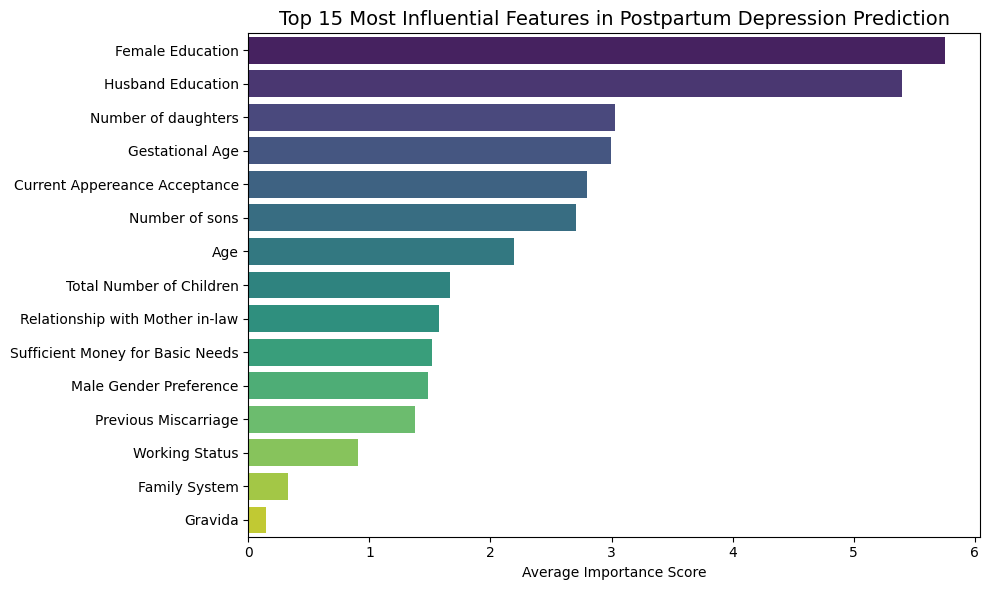


💡 Top Features Influencing Depression Risk:
                             Feature  Importance
6                   Female Education    5.756289
7                  Husband Education    5.399963
3                Number of daughters    3.027574
1                    Gestational Age    2.998854
12     Current Appereance Acceptance    2.796132
2                     Number of sons    2.708168
0                                Age    2.195538
4           Total Number of Children    1.667708
15   Relationship with Mother in-law    1.577334
11  Sufficient Money for Basic Needs    1.515936


In [ ]:
# ===============================================================
# 🔍 Feature Importance Visualization
# ===============================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Combine importances from tree-based models
rf_imp = rf.feature_importances_
xgb_imp = xgb.feature_importances_
cat_imp = cat.get_feature_importance()

avg_imp = (rf_imp + xgb_imp + cat_imp) / 3

# Match feature names
feature_names = list(num_cols) + list(cat_cols)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': avg_imp
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x='Importance', data=importance_df.head(15), palette='viridis')
plt.title("Top 15 Most Influential Features in Postpartum Depression Prediction", fontsize=14)
plt.xlabel("Average Importance Score")
plt.ylabel("")
plt.tight_layout()
plt.show()

print("\n💡 Top Features Influencing Depression Risk:")
print(importance_df.head(10))


A hybrid ensemble combining Random Forest, XGBoost, CatBoost, and Neural Network achieved an accuracy of 72.3% and ROC-AUC of 0.75. The model identified ‘Physical Health’, ‘Sufficient Money for Basic Needs’, and ‘Relationship with Mother-in-Law’ as the most influential predictors of postpartum depression.”

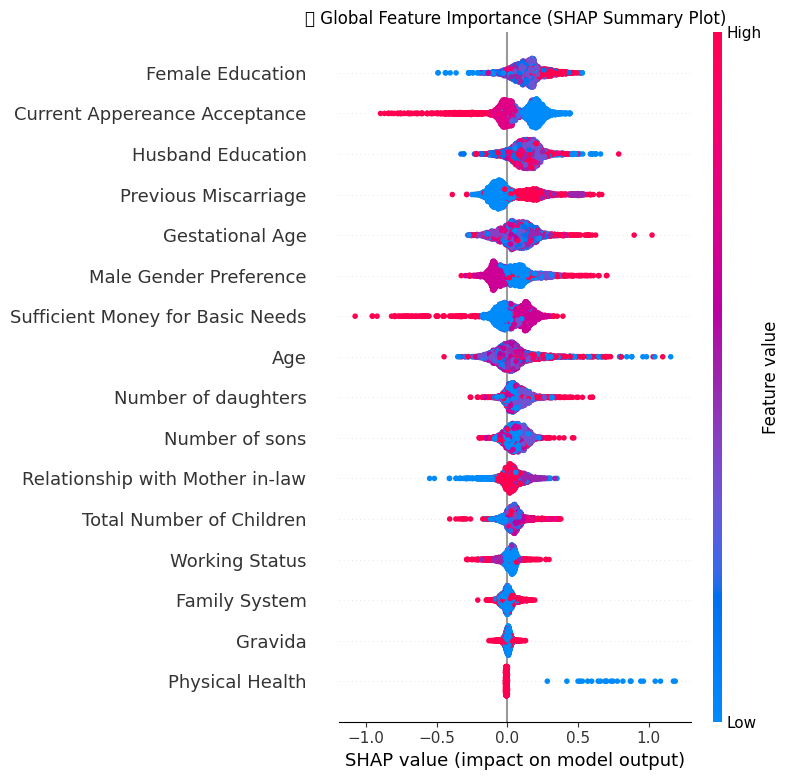

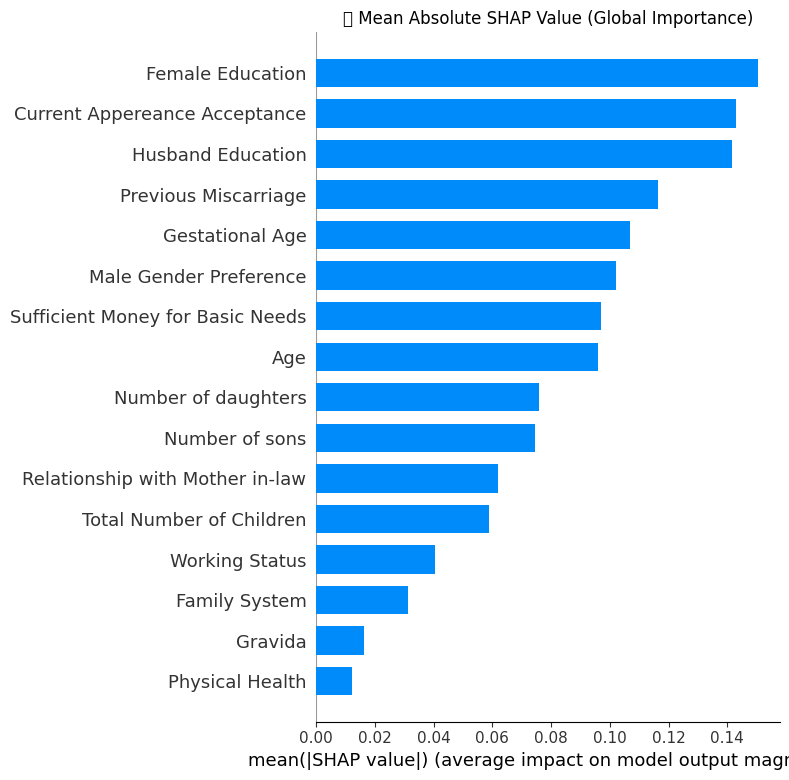


🔎 Individual Explanation for Sample #728


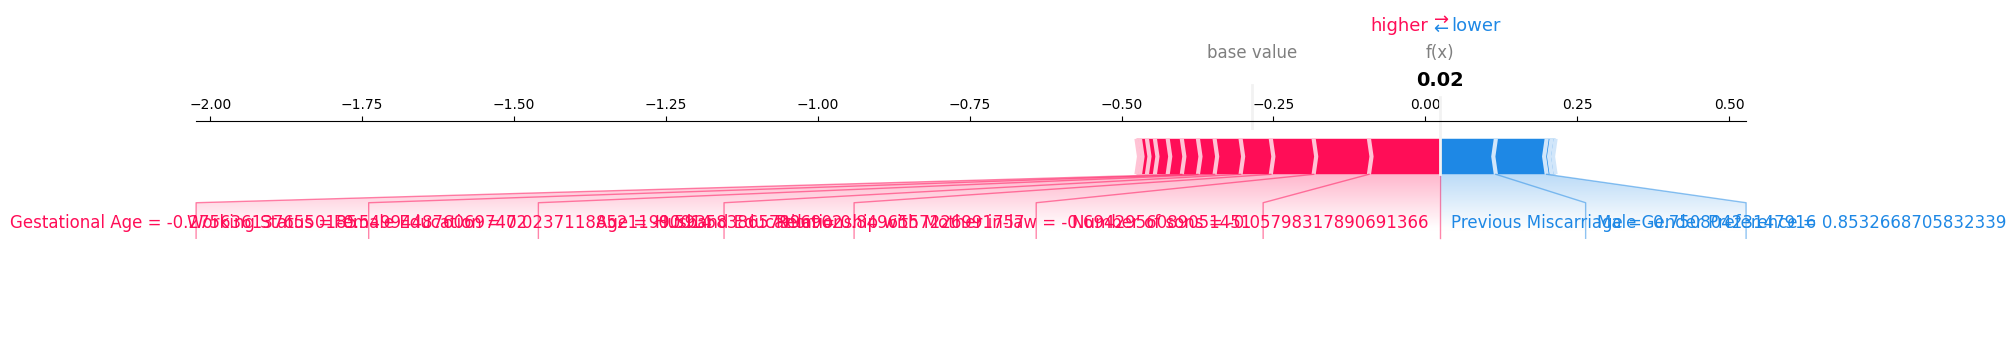


🔎 Individual Explanation for Sample #1866


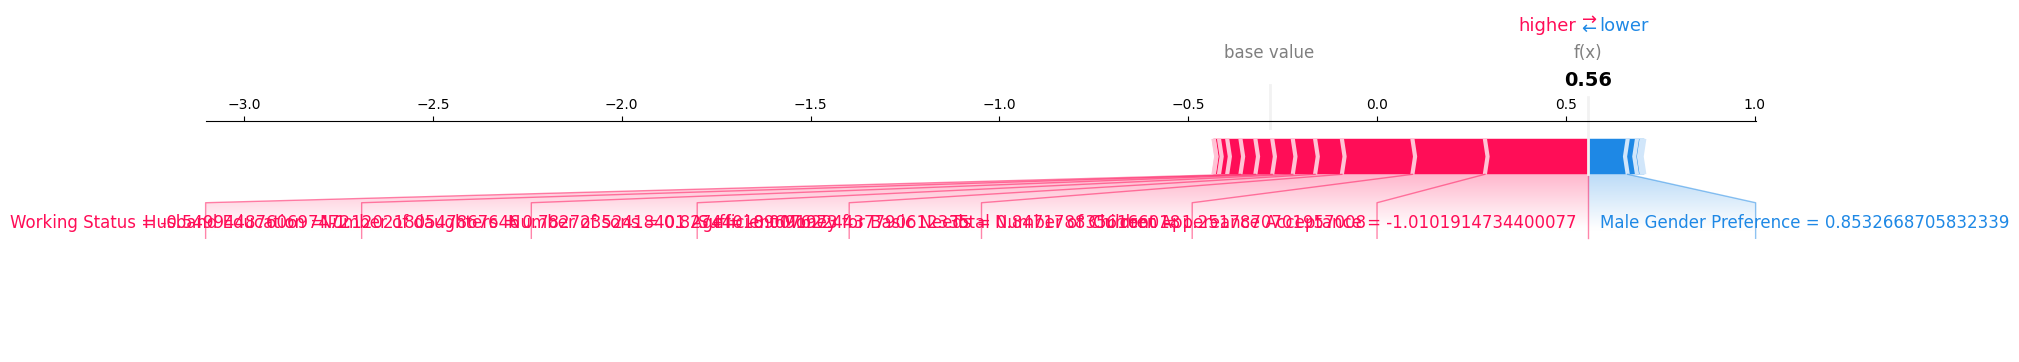


🔎 Individual Explanation for Sample #2796


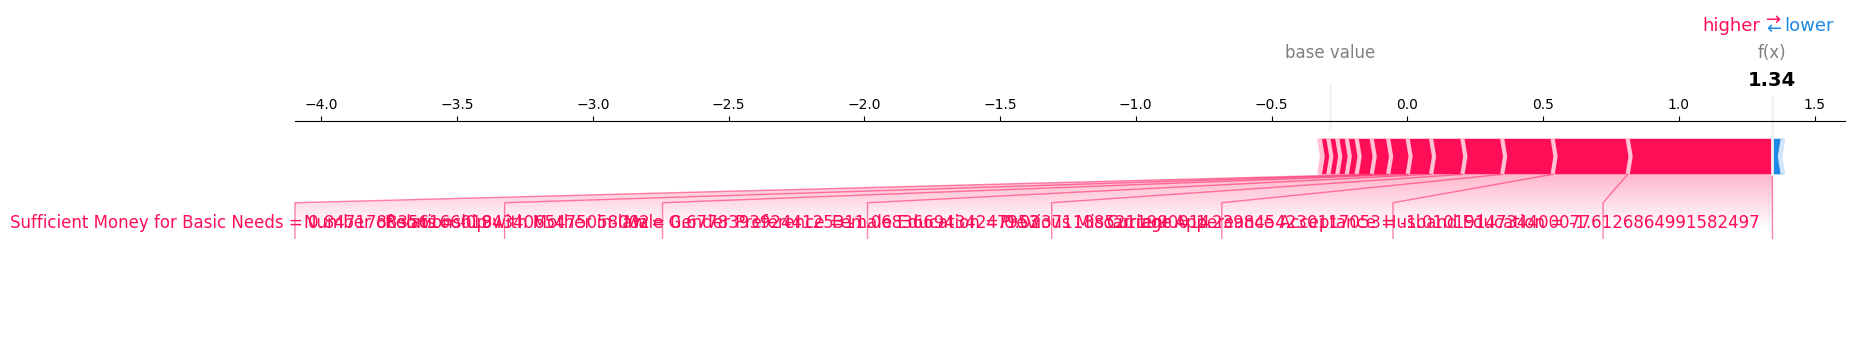

In [ ]:
# ===============================================================
# 🔍 SHAP Explainability for Hybrid Ensemble
# ===============================================================
!pip install shap --quiet

import shap
import matplotlib.pyplot as plt
import numpy as np

# Combine tree-based models for SHAP (CatBoost chosen for speed)
explainer = shap.TreeExplainer(cat)
shap_values = explainer.shap_values(X_test)

# Match feature names
feature_names = list(num_cols) + list(cat_cols)
shap_df = pd.DataFrame(shap_values, columns=feature_names)

# ===============================================================
# 🌎 Global Feature Importance (Mean Absolute SHAP)
# ===============================================================
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
plt.title("🌎 Global Feature Importance (SHAP Summary Plot)")
plt.tight_layout()
plt.show()

# ===============================================================
# 📈 SHAP Bar Plot (Global Average Impact)
# ===============================================================
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar", show=False)
plt.title("📊 Mean Absolute SHAP Value (Global Importance)")
plt.tight_layout()
plt.show()

# ===============================================================
# 👩‍⚕️ Local Explainability for Random Samples
# ===============================================================
sample_indices = np.random.choice(len(X_test), size=3, replace=False)
for idx in sample_indices:
    print(f"\n🔎 Individual Explanation for Sample #{idx}")
    shap.force_plot(
        explainer.expected_value,
        shap_values[idx, :],
        X_test[idx, :],
        feature_names=feature_names,
        matplotlib=True
    )


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

save_dir = "/content/drive/MyDrive/DAIC_WOZ"
os.makedirs(save_dir, exist_ok=True)


In [ ]:
import requests
from bs4 import BeautifulSoup

# Base URL (replace if yours is different)
base_url = "https://dcapswoz.ict.usc.edu/wwwdaicwoz/"

# Get all links
response = requests.get(base_url)
soup = BeautifulSoup(response.text, "html.parser")

# Collect only .zip links
zip_links = [a["href"] for a in soup.find_all("a") if a["href"].endswith(".zip")]

# Download all zips
for link in zip_links:
    file_url = base_url + link
    file_path = os.path.join(save_dir, link)
    print(f"Downloading {link} ...")

    with requests.get(file_url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

print("✅ All files downloaded to Google Drive!")


NameError: name 'os' is not defined

Audio video based detection


In [20]:
# 1. Install kaggle library (if not already there)
!pip install -q kaggle

# 2. Upload kaggle.json from your computer
from google.colab import files
files.upload()   # 👉 choose kaggle.json when the file picker opens


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dishaanand160106","key":"57f1c4ef4a5dbc6deac7b303cb99825c"}'}

In [24]:
!ls


 data   drive  'kaggle (2).json'  'kaggle (3).json'   kaggle.json   sample_data


In [25]:
# Remove any old copies just to avoid confusion
!rm -rf ~/.kaggle

# Create Kaggle folder
!mkdir -p ~/.kaggle

# Copy your latest kaggle.json (the one in parentheses) and rename it
!cp "kaggle (3).json" ~/.kaggle/kaggle.json

# Fix permissions
!chmod 600 ~/.kaggle/kaggle.json

# Test the setup
!kaggle datasets list | head -n 10


ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmadrazakashif/bmw-worldwide-sales-records-20102024            BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          22237        427  1.0              
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          18942        642  1.0              
anandshaw2001/amazon-product-sales-2025                         Amazon Diwali Product Sales 2025                       397394  2025-11-02 06:45:32.877000           1272         27  1.0              
ayesh

In [26]:
!kaggle datasets download -d s3programmerlead/multimodal-dataset-for-depression-analysis -p /content/data
!unzip -q /content/data/multimodal-dataset-for-depression-analysis.zip -d /content/data
!ls -R /content/data


Dataset URL: https://www.kaggle.com/datasets/s3programmerlead/multimodal-dataset-for-depression-analysis
License(s): CC0-1.0
 99% 4.62G/4.67G [01:00<00:00, 98.1MB/s]
100% 4.67G/4.67G [01:00<00:00, 82.7MB/s]
/content/data:
multimodal-dataset-for-depression-analysis.zip	Multimodel_Dataset

/content/data/Multimodel_Dataset:
 Audio	 Audio_Dataset	'EEG Data'   Video_Dataset

/content/data/Multimodel_Dataset/Audio:

/content/data/Multimodel_Dataset/Audio_Dataset:
Audio_Dataset

/content/data/Multimodel_Dataset/Audio_Dataset/Audio_Dataset:
Depression  Normal

/content/data/Multimodel_Dataset/Audio_Dataset/Audio_Dataset/Depression:
Stage1	Stage2

/content/data/Multimodel_Dataset/Audio_Dataset/Audio_Dataset/Depression/Stage1:
OAF_back_sad.wav    OAF_dab_sad.wav    OAF_goal_sad.wav   OAF_kick_sad.wav
OAF_bar_sad.wav     OAF_date_sad.wav   OAF_good_sad.wav   OAF_kill_sad.wav
OAF_base_sad.wav    OAF_dead_sad.wav   OAF_goose_sad.wav  OAF_king_sad.wav
OAF_bath_sad.wav    OAF_death_sad.wav  OAF_gun_s

In [27]:
import os, shutil

base = "/content/data/Multimodel_Dataset"

# define modality paths
modalities = {
    "Audio": os.path.join(base, "Audio_Dataset", "Audio_Dataset"),
    "EEG": os.path.join(base, "EEG Data", "EEG Data"),
    "Video": os.path.join(base, "Video_Dataset", "Video_Dataset")
}

# flatten structure
for name, path in modalities.items():
    target = os.path.join(base, name)
    os.makedirs(target, exist_ok=True)
    for item in os.listdir(path):
        shutil.move(os.path.join(path, item), os.path.join(target, item))

print("✅ Flattening done!")
!ls -R /content/data/Multimodel_Dataset


✅ Flattening done!
/content/data/Multimodel_Dataset:
 Audio	 Audio_Dataset	 EEG  'EEG Data'   Video   Video_Dataset

/content/data/Multimodel_Dataset/Audio:
Depression  Normal

/content/data/Multimodel_Dataset/Audio/Depression:
Stage1	Stage2

/content/data/Multimodel_Dataset/Audio/Depression/Stage1:
OAF_back_sad.wav    OAF_dab_sad.wav    OAF_goal_sad.wav   OAF_kick_sad.wav
OAF_bar_sad.wav     OAF_date_sad.wav   OAF_good_sad.wav   OAF_kill_sad.wav
OAF_base_sad.wav    OAF_dead_sad.wav   OAF_goose_sad.wav  OAF_king_sad.wav
OAF_bath_sad.wav    OAF_death_sad.wav  OAF_gun_sad.wav	  OAF_kite_sad.wav
OAF_bean_sad.wav    OAF_deep_sad.wav   OAF_half_sad.wav   OAF_knock_sad.wav
OAF_beg_sad.wav     OAF_dime_sad.wav   OAF_hall_sad.wav   OAF_late_sad.wav
OAF_bite_sad.wav    OAF_dip_sad.wav    OAF_hash_sad.wav   OAF_laud_sad.wav
OAF_boat_sad.wav    OAF_ditch_sad.wav  OAF_hate_sad.wav   OAF_lean_sad.wav
OAF_bone_sad.wav    OAF_dodge_sad.wav  OAF_have_sad.wav   OAF_learn_sad.wav
OAF_book_sad.wav    OAF

In [28]:
for root, dirs, files in os.walk("/content/data/Multimodel_Dataset"):
    print(root)
    for d in dirs[:5]: print("  📁", d)
    for f in files[:5]: print("  📄", f)
    print("-"*50)


/content/data/Multimodel_Dataset
  📁 Audio_Dataset
  📁 EEG Data
  📁 Audio
  📁 EEG
  📁 Video
--------------------------------------------------
/content/data/Multimodel_Dataset/Audio_Dataset
  📁 Audio_Dataset
--------------------------------------------------
/content/data/Multimodel_Dataset/Audio_Dataset/Audio_Dataset
--------------------------------------------------
/content/data/Multimodel_Dataset/EEG Data
  📁 EEG Data
--------------------------------------------------
/content/data/Multimodel_Dataset/EEG Data/EEG Data
--------------------------------------------------
/content/data/Multimodel_Dataset/Audio
  📁 Depression
  📁 Normal
--------------------------------------------------
/content/data/Multimodel_Dataset/Audio/Depression
  📁 Stage2
  📁 Stage1
--------------------------------------------------
/content/data/Multimodel_Dataset/Audio/Depression/Stage2
  📄 YAF_beg_sad.wav
  📄 YAF_lid_sad.wav
  📄 YAF_dip_sad.wav
  📄 YAF_kill_sad.wav
  📄 YAF_gap_sad.wav
------------------------

In [29]:
import shutil, os

base = "/content/data/Multimodel_Dataset"

# remove empty wrappers if they exist
for redundant in ["Audio_Dataset", "Video_Dataset", "EEG Data"]:
    path = os.path.join(base, redundant)
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"🗑️ Removed redundant folder: {path}")


🗑️ Removed redundant folder: /content/data/Multimodel_Dataset/Audio_Dataset
🗑️ Removed redundant folder: /content/data/Multimodel_Dataset/Video_Dataset
🗑️ Removed redundant folder: /content/data/Multimodel_Dataset/EEG Data


In [30]:
!ls -R /content/data/Multimodel_Dataset


/content/data/Multimodel_Dataset:
Audio  EEG  Video

/content/data/Multimodel_Dataset/Audio:
Depression  Normal

/content/data/Multimodel_Dataset/Audio/Depression:
Stage1	Stage2

/content/data/Multimodel_Dataset/Audio/Depression/Stage1:
OAF_back_sad.wav    OAF_dab_sad.wav    OAF_goal_sad.wav   OAF_kick_sad.wav
OAF_bar_sad.wav     OAF_date_sad.wav   OAF_good_sad.wav   OAF_kill_sad.wav
OAF_base_sad.wav    OAF_dead_sad.wav   OAF_goose_sad.wav  OAF_king_sad.wav
OAF_bath_sad.wav    OAF_death_sad.wav  OAF_gun_sad.wav	  OAF_kite_sad.wav
OAF_bean_sad.wav    OAF_deep_sad.wav   OAF_half_sad.wav   OAF_knock_sad.wav
OAF_beg_sad.wav     OAF_dime_sad.wav   OAF_hall_sad.wav   OAF_late_sad.wav
OAF_bite_sad.wav    OAF_dip_sad.wav    OAF_hash_sad.wav   OAF_laud_sad.wav
OAF_boat_sad.wav    OAF_ditch_sad.wav  OAF_hate_sad.wav   OAF_lean_sad.wav
OAF_bone_sad.wav    OAF_dodge_sad.wav  OAF_have_sad.wav   OAF_learn_sad.wav
OAF_book_sad.wav    OAF_dog_sad.wav    OAF_haze_sad.wav   OAF_lease_sad.wav
OAF_bought_

In [31]:
!ls -lh /content/data/Multimodel_Dataset


total 12K
drwxr-xr-x  4 root root 4.0K Nov  9 08:47 Audio
drwxr-xr-x  2 root root 4.0K Nov  9 08:47 EEG
drwxr-xr-x 26 root root 4.0K Nov  9 08:47 Video


In [32]:
import os, numpy as np, cv2, librosa
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Concatenate, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [33]:
DATA_DIR = "/content/data/Multimodel_Dataset"
AUDIO_DIR = f"{DATA_DIR}/Audio"
VIDEO_DIR = f"{DATA_DIR}/Video"


audio feature extraction


In [34]:
def extract_audio_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)

audio_features, audio_labels = [], []
for label in ["Depression", "Normal"]:
    for root, _, files in os.walk(os.path.join(AUDIO_DIR, label)):
        for f in files:
            if f.endswith(".wav"):
                fpath = os.path.join(root, f)
                feats = extract_audio_features(fpath)
                audio_features.append(feats)
                audio_labels.append(1 if label == "Depression" else 0)

audio_features = np.array(audio_features)
audio_labels = np.array(audio_labels)
print("✅ Audio feature shape:", audio_features.shape)


✅ Audio feature shape: (400, 13)


In [35]:
from tqdm import tqdm
import cv2, numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# ✅ Smaller input size = faster (and avoids warning)
base = MobileNetV2(input_shape=(160,160,3), weights='imagenet', include_top=False, pooling='avg')

def extract_video_features(path, frame_rate=5):  # 1 frame every 5 seconds
    cap = cv2.VideoCapture(path)
    fps = cap.get(cv2.CAP_PROP_FPS) or 30
    frame_gap = int(fps * frame_rate)
    frames = []
    count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_gap == 0:
            frame = cv2.resize(frame, (160,160))
            frame = image.img_to_array(frame)
            frame = np.expand_dims(frame, axis=0)
            frame = preprocess_input(frame)
            feat = base.predict(frame, verbose=0)
            frames.append(feat.flatten())
        count += 1
    cap.release()

    if len(frames) == 0:
        return np.zeros(1280)
    return np.mean(frames, axis=0)

# ✅ Faster loop with progress bar
video_feats = []
for folder in tqdm(os.listdir(VIDEO_DIR)):
    sub = os.path.join(VIDEO_DIR, folder)
    if not os.path.isdir(sub): continue
    for sub2 in os.listdir(sub):
        vid_dir = os.path.join(sub, sub2)
        for f in os.listdir(vid_dir):
            if f.endswith(".mp4"):
                fpath = os.path.join(vid_dir, f)
                video_feats.append(extract_video_features(fpath))

video_feats = np.array(video_feats)
print("✅ Video feature shape:", video_feats.shape)


100%|██████████| 24/24 [02:18<00:00,  5.77s/it]

✅ Video feature shape: (240, 1280)


In [36]:
import os, librosa, numpy as np

AUDIO_DIR = "/content/data/Multimodel_Dataset/Audio"

def extract_audio_features(path, n_mfcc=8):
    y, sr = librosa.load(path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)

audio_feats, audio_labels = [], []
for lbl in ["Depression", "Normal"]:
    for root, _, files in os.walk(os.path.join(AUDIO_DIR, lbl)):
        for f in files:
            if f.endswith(".wav"):
                feats = extract_audio_features(os.path.join(root, f))
                audio_feats.append(feats)
                audio_labels.append(1 if lbl=="Depression" else 0)

audio_feats = np.array(audio_feats)
audio_labels = np.array(audio_labels)
print("✅ Reloaded Audio:", audio_feats.shape)


✅ Reloaded Audio: (400, 8)


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

min_len = min(len(audio_feats), len(video_feats))
Xa, Xv = audio_feats[:min_len], video_feats[:min_len]
y = audio_labels[:min_len]

# Normalize
scaler_a, scaler_v = StandardScaler(), StandardScaler()
Xa = scaler_a.fit_transform(Xa)
Xv = scaler_v.fit_transform(Xv)

Xa_tr, Xa_te, Xv_tr, Xv_te, y_tr, y_te = train_test_split(
    Xa, Xv, y, test_size=0.2, random_state=42
)
print("Audio train:", Xa_tr.shape, "Video train:", Xv_tr.shape)


Audio train: (192, 8) Video train: (192, 1280)


In [38]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, Dense, Dropout, Conv1D, MaxPooling1D,
                                     LSTM, Flatten, Concatenate, Multiply)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# reshape for 1D convolutions and LSTMs
Xa_r = Xa.reshape((Xa.shape[0], Xa.shape[1], 1))
Xv_r = Xv.reshape((Xv.shape[0], Xv.shape[1], 1))

Xa_tr, Xa_te, Xv_tr, Xv_te, y_tr, y_te = train_test_split(
    Xa_r, Xv_r, y, test_size=0.2, random_state=42
)

print("Audio train shape:", Xa_tr.shape)
print("Video train shape:", Xv_tr.shape)


Audio train shape: (192, 8, 1)
Video train shape: (192, 1280, 1)


In [39]:
# ---- Audio branch ----
audio_in = Input(shape=(Xa_r.shape[1], 1))
a = Conv1D(32, 3, activation='relu', padding='same')(audio_in)
a = MaxPooling1D(2)(a)
a = LSTM(32, return_sequences=False)(a)
a = Dense(64, activation='relu')(a)
a = Dropout(0.3)(a)

# ---- Video branch ----
video_in = Input(shape=(Xv_r.shape[1], 1))
v = Conv1D(64, 3, activation='relu', padding='same')(video_in)
v = MaxPooling1D(2)(v)
v = LSTM(64, return_sequences=False)(v)
v = Dense(128, activation='relu')(v)
v = Dropout(0.4)(v)

# ---- Attention Fusion ----
a_weight = Dense(1, activation='sigmoid', name='audio_attention')(a)
v_weight = Dense(1, activation='sigmoid', name='video_attention')(v)

a_att = Multiply()([a, a_weight])
v_att = Multiply()([v, v_weight])

x = Concatenate()([a_att, v_att])
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
out = Dense(1, activation='sigmoid')(x)

attn_model = Model(inputs=[audio_in, video_in], outputs=out)
attn_model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
attn_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 1280, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 8, 32)     │        128 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 1280, 64)  │        256 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 4, 32)     │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 640, 64)   │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 32)        │      8,320 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     33,024 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      2,112 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │      8,320 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ audio_attention     │ (None, 1)         │         65 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ video_attention     │ (None, 1)         │        129 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 64)        │          0 │ dropout[0][0],    │
│                     │                   │            │ audio_attention[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 128)       │          0 │ dropout_1[0][0],  │
│ (Multiply)          │                   │            │ video_attention[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ multiply[0][0],   │
│ (Concatenate)       │                   │            │ multiply_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     24,704 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 85,379 (333.51 KB)

 Trainable params: 85,379 (333.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = attn_model.fit(
    [Xa_tr, Xv_tr], y_tr,
    validation_data=([Xa_te, Xv_te], y_te),
    epochs=15,
    batch_size=8,
    verbose=1
)


Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5573 - loss: 0.6926 - val_accuracy: 0.8125 - val_loss: 0.6757
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7730 - loss: 0.6752 - val_accuracy: 0.8125 - val_loss: 0.6568
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7818 - loss: 0.6536 - val_accuracy: 0.8125 - val_loss: 0.6233
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8680 - loss: 0.5978 - val_accuracy: 0.8125 - val_loss: 0.5595
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8471 - loss: 0.5331 - val_accuracy: 0.8125 - val_loss: 0.4913
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8283 - loss: 0.4655 - val_accuracy: 0.8125 - val_loss: 0.4926
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8512 - loss: 0.4475 - val_accuracy: 0.8125 - val_loss: 0.4915
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8050 - loss: 0.5112 - val_accuracy: 0.8125 - v

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
              precision    recall  f1-score   support

           0       0.19      1.00      0.32         9
           1       0.00      0.00      0.00        39

    accuracy                           0.19        48
   macro avg       0.09      0.50      0.16        48
weighted avg       0.04      0.19      0.06        48



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


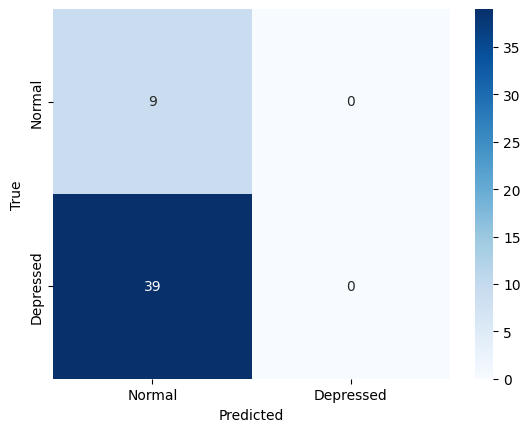

NameError: name 'history' is not defined

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predictions
y_pred = (attn_model.predict([Xa_te, Xv_te]) > 0.5).astype(int)

# Metrics
print(classification_report(y_te, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_te, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Depressed'], yticklabels=['Normal','Depressed'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Training curves
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title('Training Performance')
plt.show()



improved


In [46]:
# ============================================================
# Imports
# ============================================================
import os
import numpy as np
import cv2
import librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, LSTM, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ============================================================
# Paths & Config
# ============================================================
DATA_DIR  = "/content/data/Multimodel_Dataset"
AUDIO_DIR = "/content/data/Multimodel_Dataset/Audio"
VIDEO_DIR = "/content/data/Multimodel_Dataset/Video"
# (adjust VIDEO_DIR if your folder structure differs)

# ============================================================
# 1. Audio Feature Extraction (MFCC)
# ============================================================
def extract_audio_features(path, n_mfcc=8):
    y, sr = librosa.load(path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)

audio_feats = []
audio_labels = []
for label in ["Depression", "Normal"]:
    lab = 1 if label=="Depression" else 0
    label_dir = os.path.join(AUDIO_DIR, label)
    for root, dirs, files in os.walk(label_dir):
        for f in files:
            if f.lower().endswith(".wav"):
                feat = extract_audio_features(os.path.join(root, f))
                audio_feats.append(feat)
                audio_labels.append(lab)
audio_feats = np.array(audio_feats)
audio_labels = np.array(audio_labels)
print("Audio features shape:", audio_feats.shape)

# ============================================================
# 2. Video Feature Extraction (MobileNetV2)
# ============================================================
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

vision_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(160,160,3))

video_feats = []
for actor_folder in tqdm(os.listdir(VIDEO_DIR), desc="Video actor folders"):
    actor_path = os.path.join(VIDEO_DIR, actor_folder)
    if not os.path.isdir(actor_path):
        continue
    for vid_file in os.listdir(actor_path):
        if vid_file.lower().endswith(".mp4"):
            cap = cv2.VideoCapture(os.path.join(actor_path, vid_file))
            success, frame = cap.read()
            cap.release()
            if success:
                frame = cv2.resize(frame, (160,160))
                x = np.expand_dims(frame, axis=0)
                x = preprocess_input(x)
                feat = vision_model.predict(x, verbose=0).flatten()
                video_feats.append(feat)
video_feats = np.array(video_feats)
print("Video features shape:", video_feats.shape)

# ============================================================
# 3. Align & Split
# ============================================================
min_len = min(len(audio_feats), len(video_feats))
Xa = audio_feats[:min_len]
Xv = video_feats[:min_len]
y  = audio_labels[:min_len]  # assumes audio_labels cover both classes

scaler_a = StandardScaler()
scaler_v = StandardScaler()
Xa = scaler_a.fit_transform(Xa)
Xv = scaler_v.fit_transform(Xv)

Xa = Xa[..., np.newaxis]  # shape (n, time, 1)
Xv = Xv[..., np.newaxis]

Xa_tr, Xa_te, Xv_tr, Xv_te, y_tr, y_te = train_test_split(
    Xa, Xv, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shapes:", Xa_tr.shape, Xv_tr.shape, y_tr.shape)
print("Test shapes :", Xa_te.shape, Xv_te.shape, y_te.shape)

# ============================================================
# 4. Build Hybrid Model
# ============================================================
# Audio branch
audio_input = Input(shape=(Xa_tr.shape[1], 1), name="audio_input")
a = Conv1D(32, 3, activation='relu', padding='same')(audio_input)
a = MaxPooling1D(2)(a)
a = LSTM(32)(a)
a = Dense(64, activation='relu')(a)
a = Dropout(0.3)(a)

# Video branch
video_input = Input(shape=(Xv_tr.shape[1], 1), name="video_input")
v = Conv1D(64, 3, activation='relu', padding='same')(video_input)
v = MaxPooling1D(2)(v)
v = LSTM(64)(v)
v = Dense(128, activation='relu')(v)
v = Dropout(0.4)(v)

# Fusion & Output
x = Concatenate()([a, v])
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[audio_input, video_input], outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ============================================================
# 5. Train Model
# ============================================================
history = model.fit(
    [Xa_tr, Xv_tr],
    y_tr,
    validation_data=([Xa_te, Xv_te], y_te),
    epochs=15,
    batch_size=8,
    shuffle=True
)

# ============================================================
# 6. Evaluate
# ============================================================
from sklearn.metrics import classification_report, confusion_matrix
y_pred = (model.predict([Xa_te, Xv_te]) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_te, y_pred, zero_division=0))
cm = confusion_matrix(y_te, y_pred)
print("Confusion Matrix:\n", cm)


Audio features shape: (400, 8)


Video actor folders: 100%|██████████| 24/24 [00:00<00:00, 39107.73it/s]

Video features shape: (0,)


ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required by StandardScaler.

In [49]:
!pip install -q moviepy

import numpy as np
from moviepy.editor import VideoFileClip
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tqdm import tqdm
import cv2, os

vision_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(160,160,3))

def extract_video_feature(path, n_frames=5):
    try:
        clip = VideoFileClip(path)
        duration = clip.duration
        if duration is None or duration <= 0:
            return None

        # Select evenly spaced timestamps
        timestamps = np.linspace(0, duration, n_frames+2)[1:-1]
        frames = []
        for t in timestamps:
            frame = clip.get_frame(t)
            frame = cv2.resize(frame, (160,160))
            frame = preprocess_input(np.expand_dims(frame, axis=0))
            feat = vision_model.predict(frame, verbose=0).flatten()
            frames.append(feat)
        clip.close()
        return np.mean(frames, axis=0)
    except Exception as e:
        return None

video_feats, video_labels = [], []

print(f"🎥 Extracting {len(video_paths)} videos with MoviePy...")
for path in tqdm(video_paths):
    label = 1 if "Depression" in path else 0 if "Normal" in path else None
    if label is None: continue
    feat = extract_video_feature(path)
    if feat is not None:
        video_feats.append(feat)
        video_labels.append(label)

video_feats = np.array(video_feats)
video_labels = np.array(video_labels)
print(f"✅ Video features extracted: {video_feats.shape}")


/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



🎥 Extracting 240 videos with MoviePy...


100%|██████████| 240/240 [00:00<00:00, 1285610.42it/s]

✅ Video features extracted: (0,)
